# I. Problem Statement

## 1.1. Profile

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## 1.2. Goals of the Case Study

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# II. Reading and Understanding the Data

## 2.1. Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

import warnings
warnings.filterwarnings('ignore')

## 2.2. Understanding the dataset

In [2]:
#Read the dataset

data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
#Checking the dimensions

data.shape

(1460, 81)

In [4]:
#Datatypes of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

All the dataypes of the variables are in correct format.

In [5]:
#Summary of all the numeric columns

data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#Checking missing values

data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
#Checking duplicates

sum(data.duplicated(subset = 'Id')) == 0

True

In [8]:
#Checking for outlier in the numerical columns

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

# III. Data Analysis

## 3.1. Handling null values

In [9]:
#Presenting the null percentages

round(data.isnull().sum()/len(data.index),2)*100

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

In [10]:
# Grouping null columns

data.columns[data.isnull().any()] 

null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

These nulls may affect the price. Thus, we will impute the categorical variables with 'None'

In [11]:
valued_null = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

for i in valued_null:
    data[i].fillna("none", inplace=True)

In [12]:
#Checking nulls again

data.columns[data.isnull().any()] 

null2 = data.isnull().sum()/len(data)*100
null2 = null2[null2>0]
null2.sort_values(inplace=True, ascending=False)
null2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [13]:
# As 'LotFrontage' is Linear feet of street connected to property and others are fair distribution, they can be imputed with similar 'Neighborhood' values and median respectively.

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)
data['Electrical'].dropna(inplace=True)

In [14]:
#Checking the null percentages again

round(data.isnull().sum()/len(data.index),2)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

## 3.2. Transforming data types

Comparing to the data description of each columns, we should change the type of these datas:

- 'MSSubClass', 'OverallQual', 'OverallCond' need to be converted to object type
- 'LotFrontage' and 'MasVnrArea' needs to be converted to numeric type.

In [15]:
#Converting to 'object' type

data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [16]:
#Converting to 'numeric' type

data['LotFrontage'] = pd.to_numeric(data['LotFrontage'], errors='coerce')
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'], errors='coerce')

In [17]:
#Datatypes of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

# IV. Exploratory Data Analysis

In [18]:
#Dividing the dataframe df into numerical and categorical columns for EDA

#Extracting numerical columns
data_num = data.select_dtypes(include=['int64', 'float64'])
data_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

## 4.1. Numerical Analysis

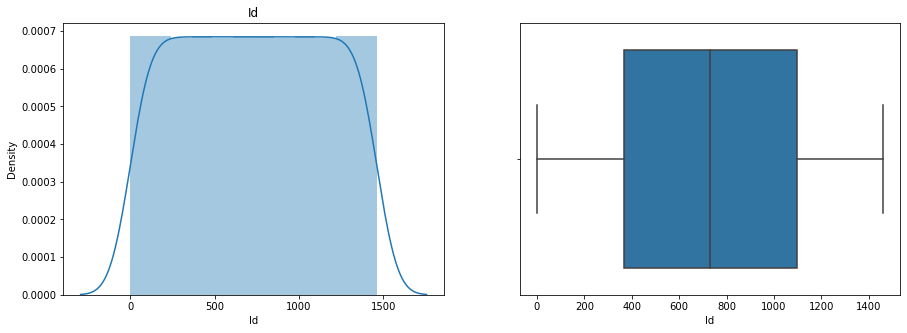

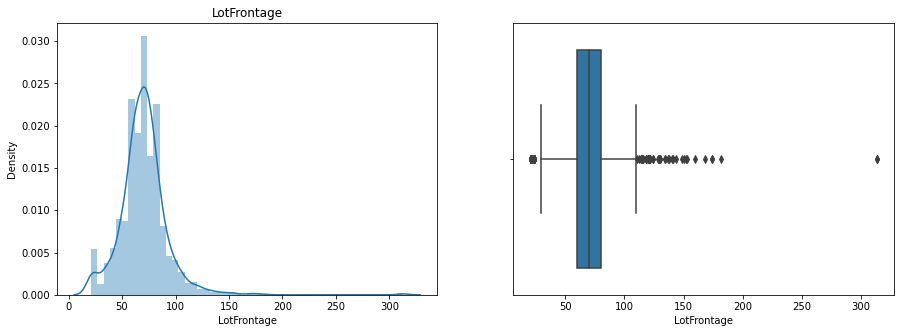

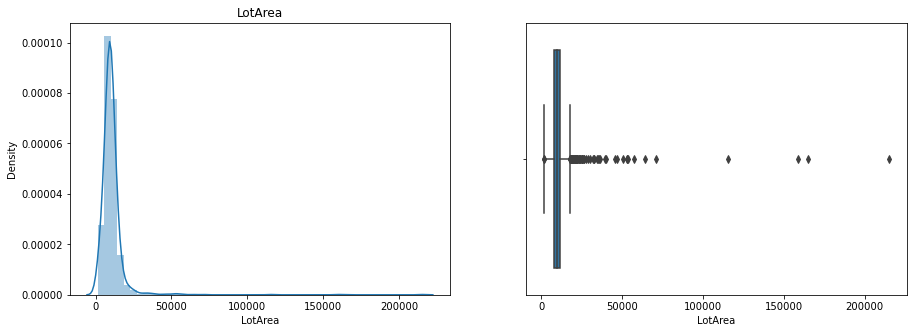

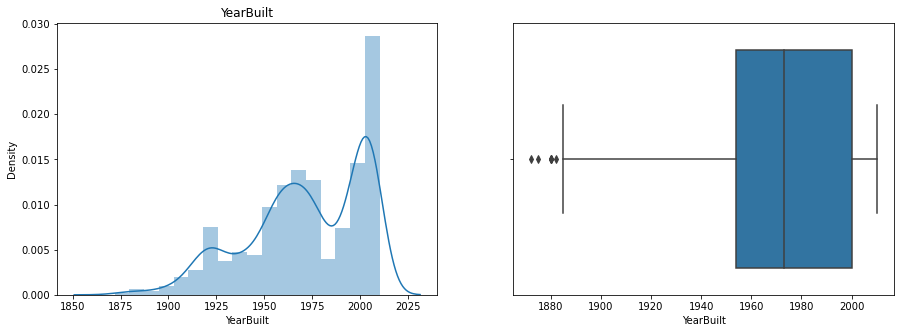

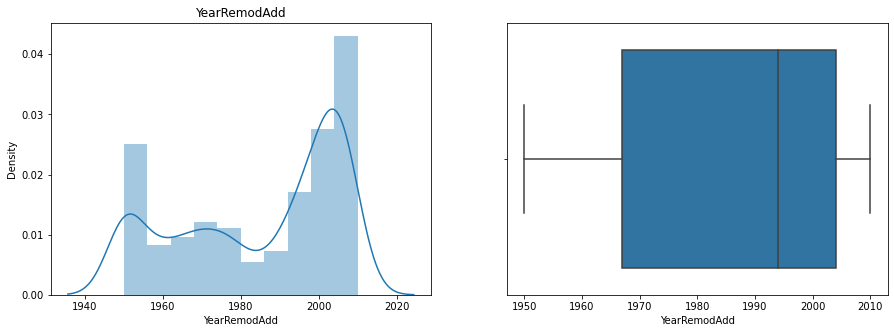

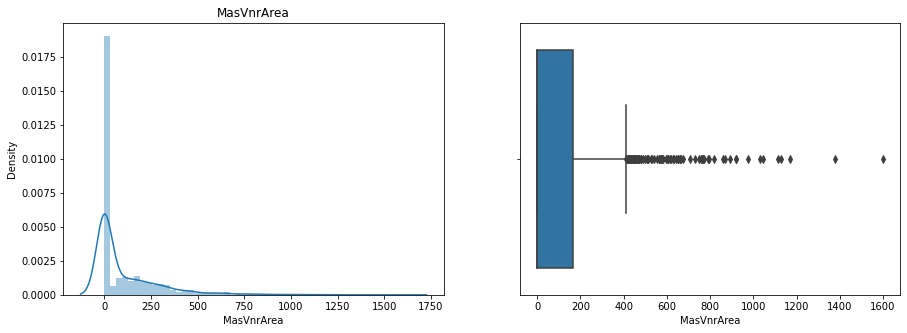

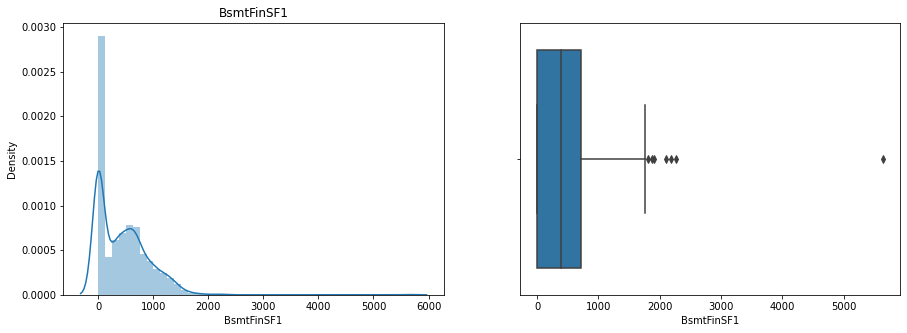

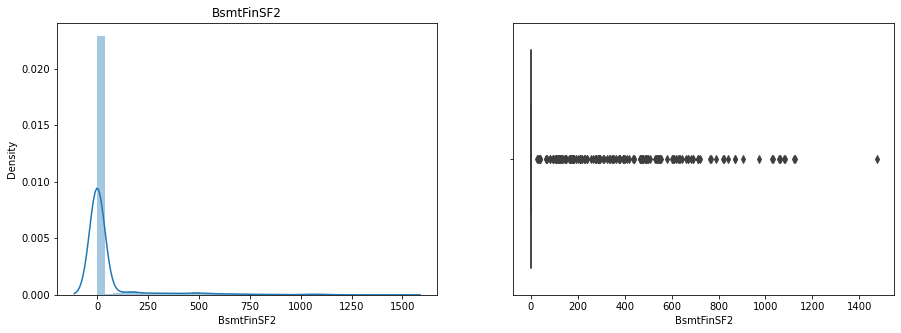

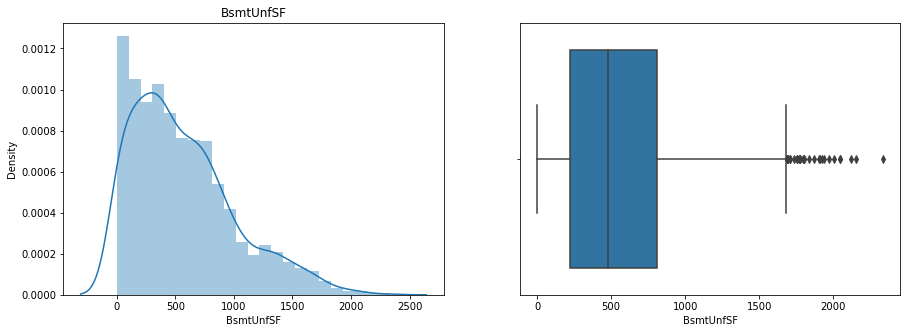

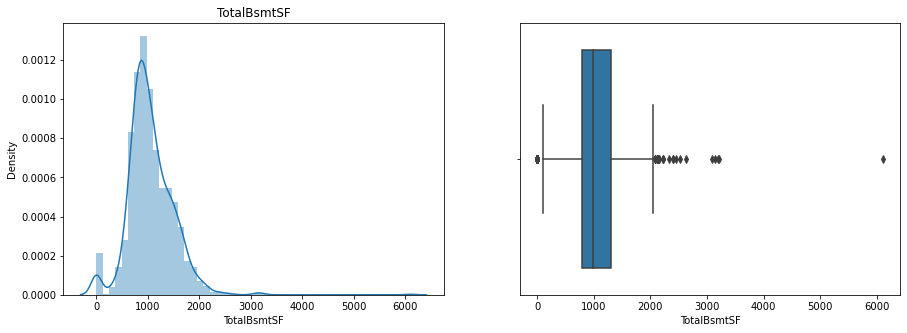

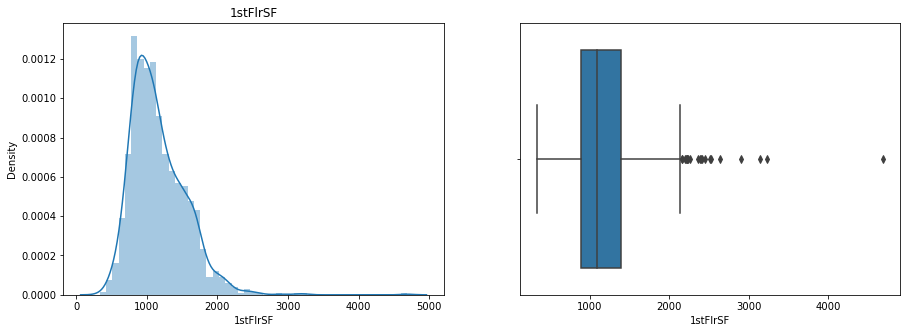

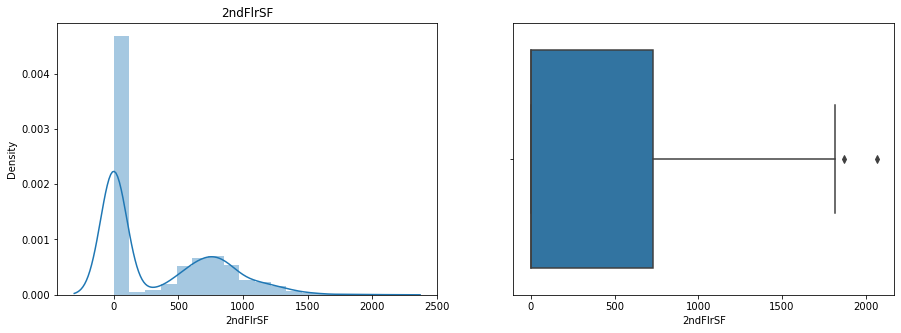

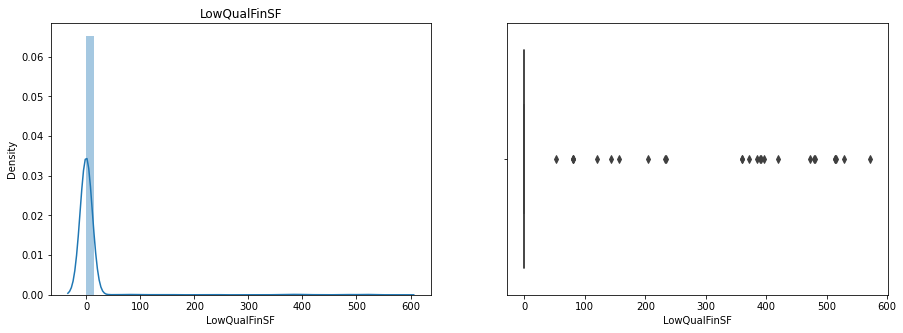

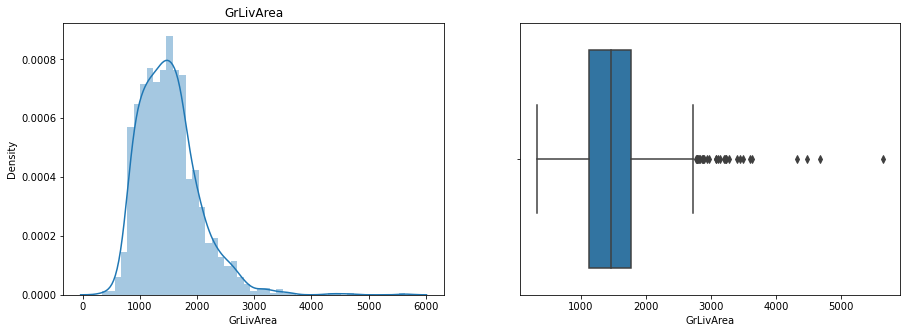

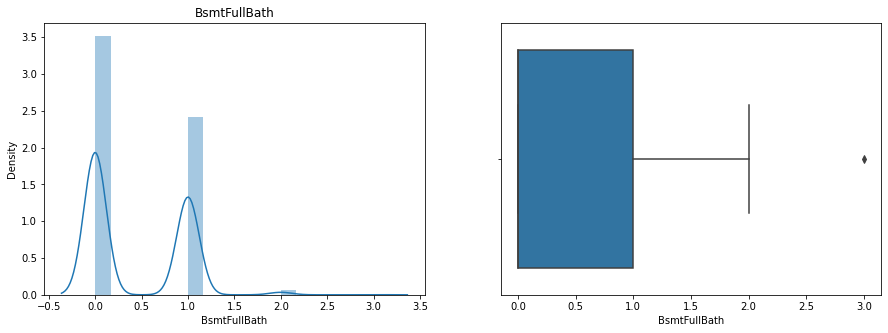

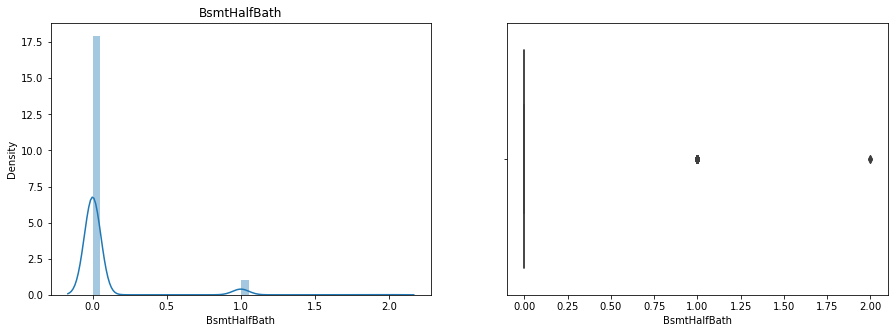

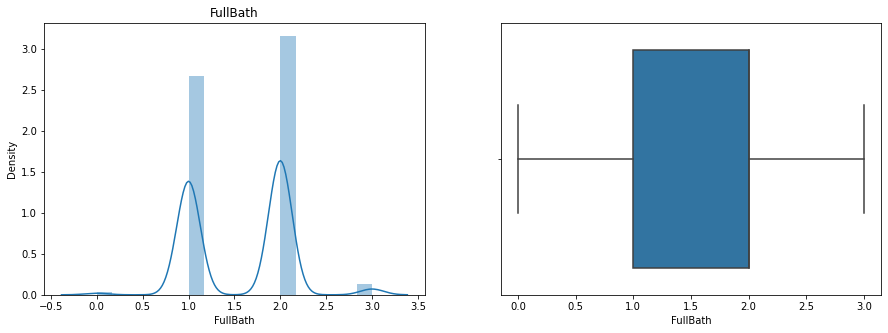

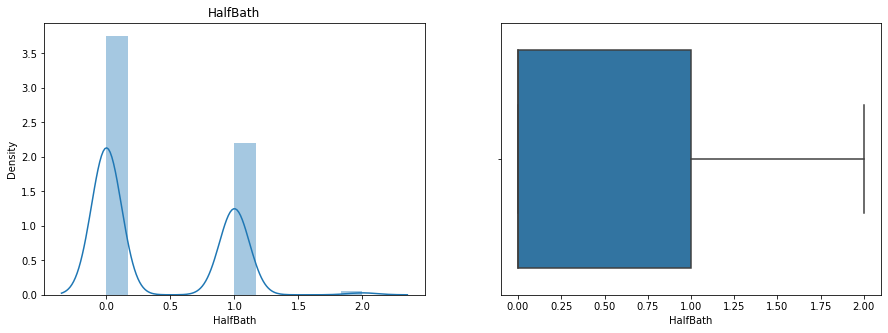

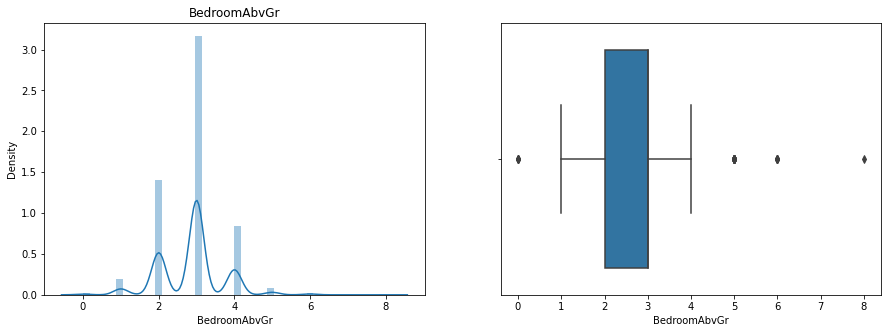

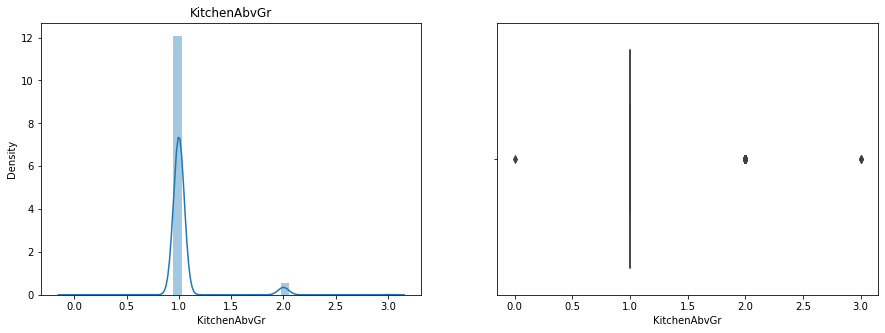

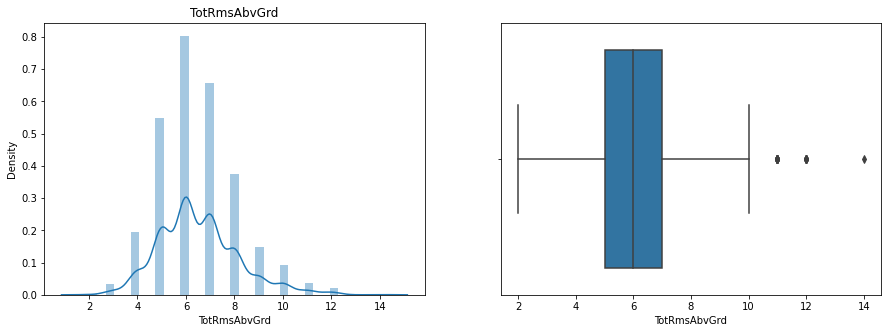

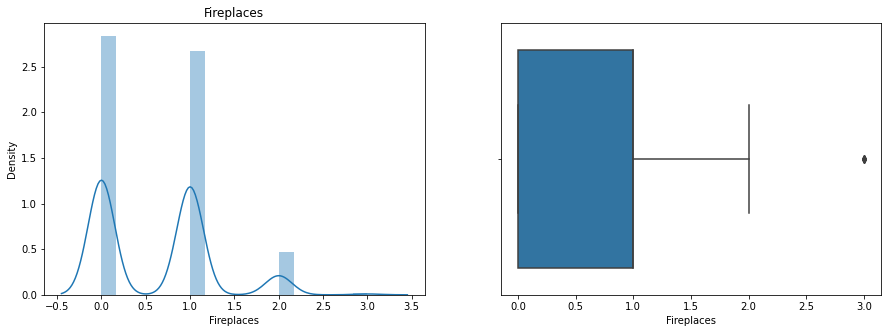

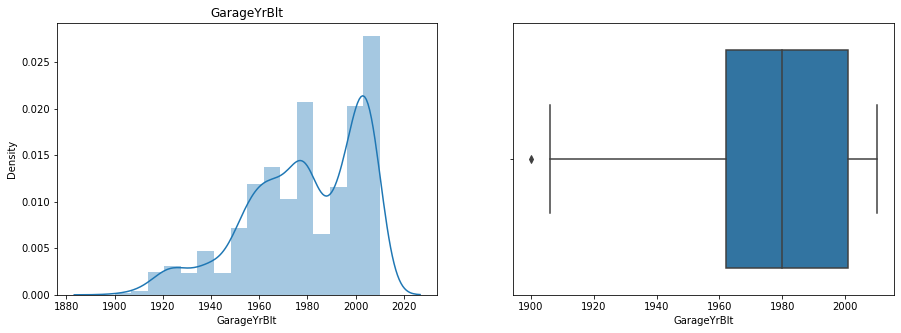

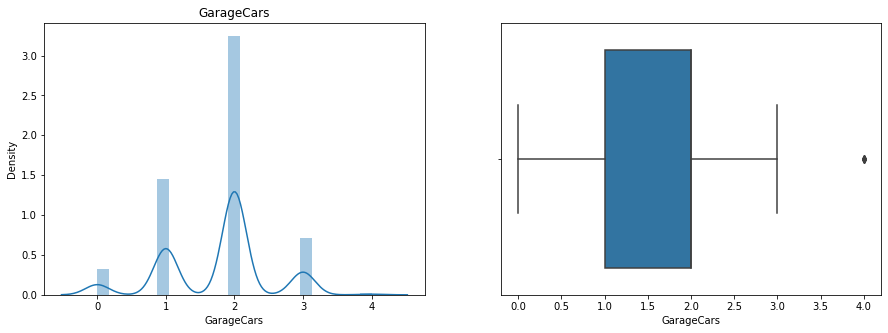

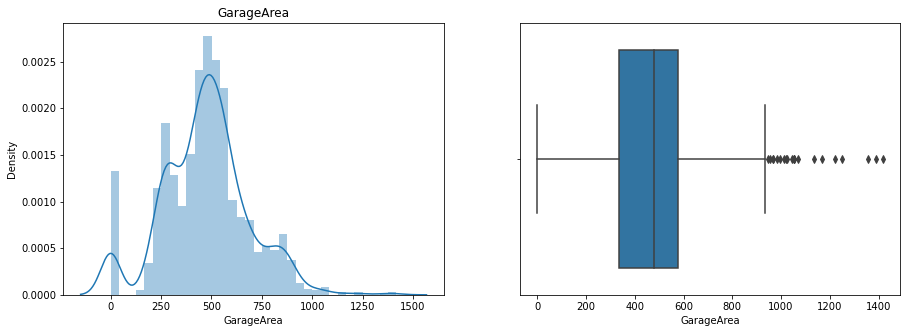

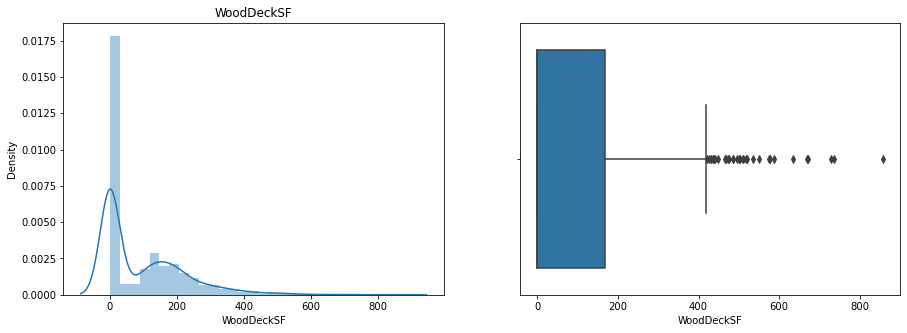

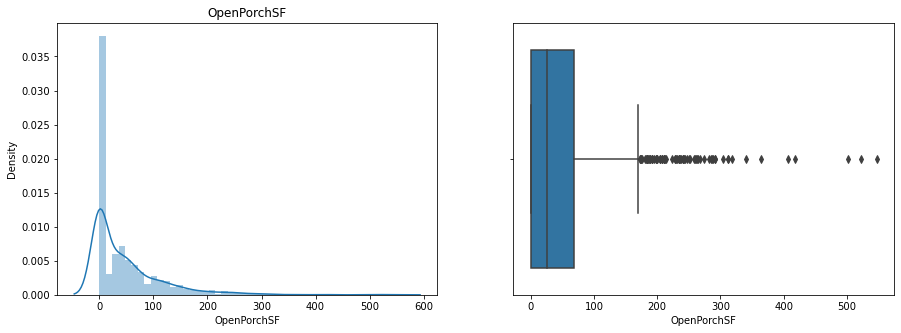

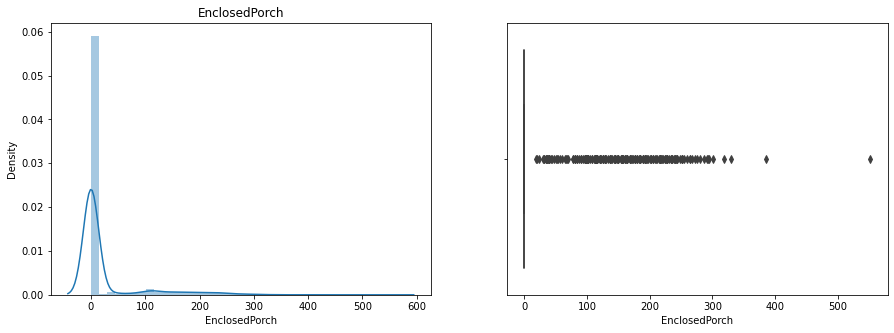

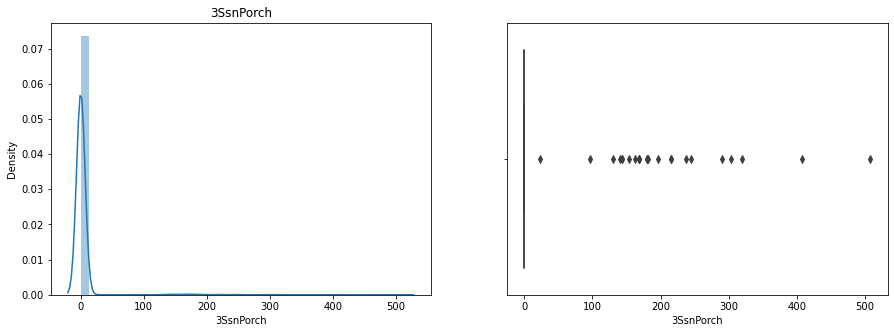

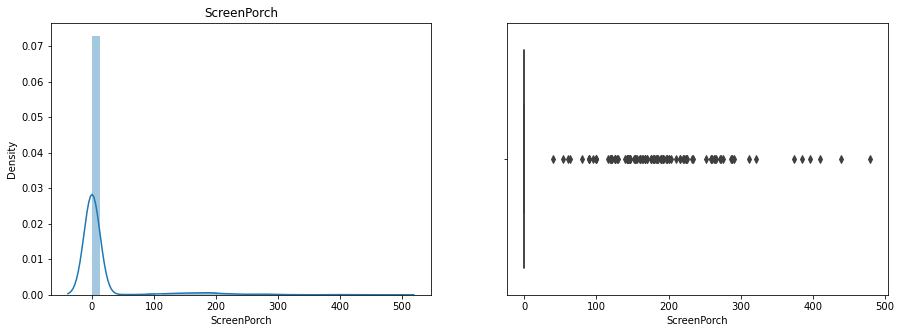

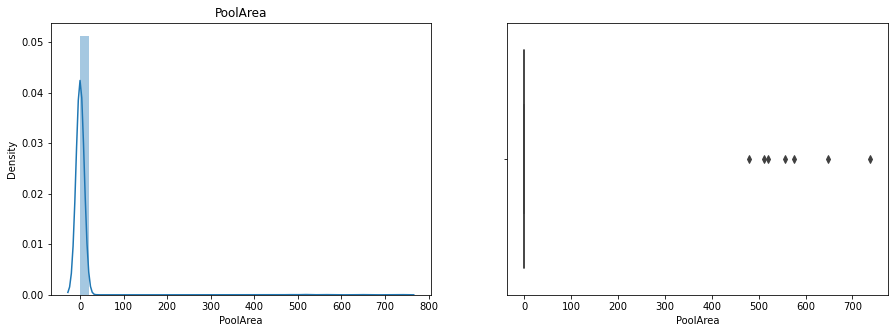

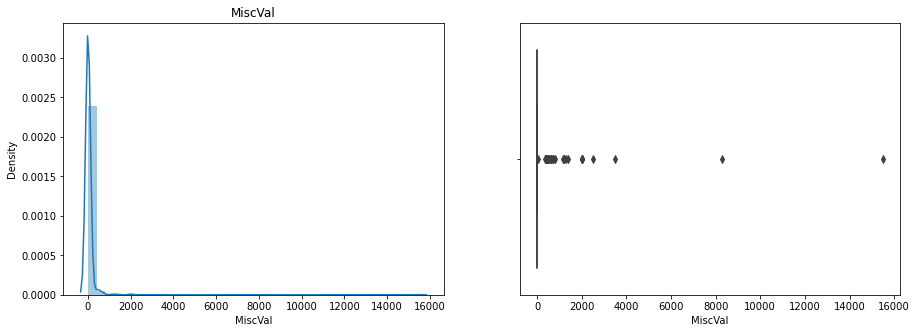

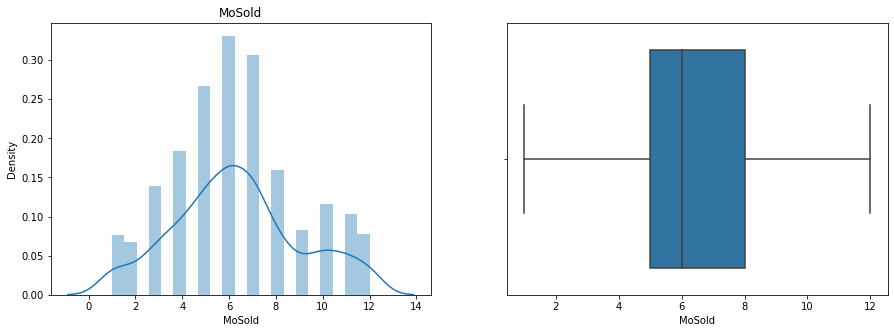

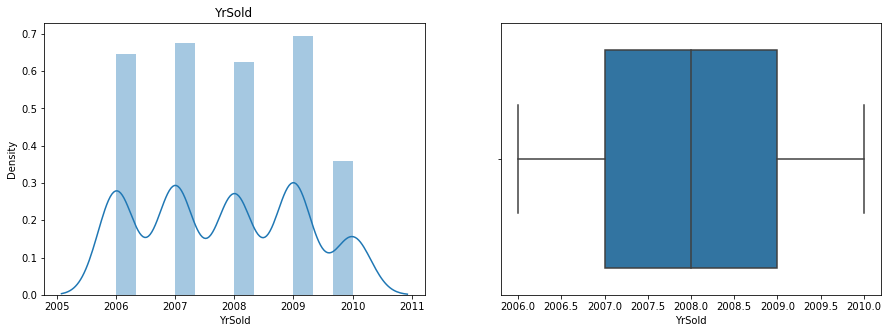

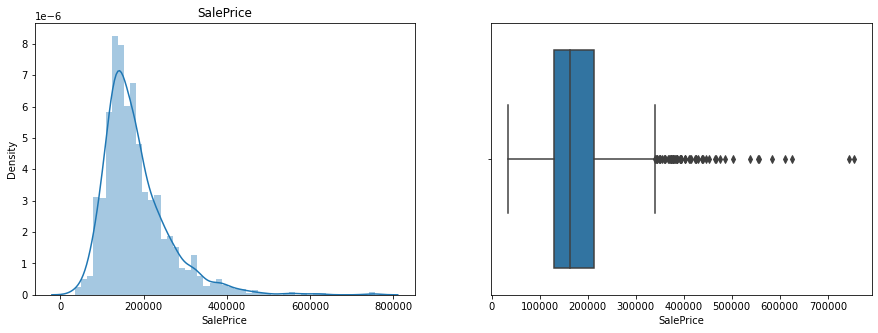

In [19]:
#Let's use histograms and boxplots to see the distribution of all numeric variables

for col in data_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col)
    sns.distplot(data_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(data_num[col])
    plt.show()  

**Findings:**

- Many columns have non-normal distribution.
- Most of the columns have outliers.

## 4.2. Categorical Analysis

In [20]:
#Extracting categorical columns
data_cat = data.select_dtypes(include='object')
data_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  none      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  none      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  none      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  none      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  none      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual  \
0          Gd        Typ        none     Attchd          RFn         TA   
1          TA        Typ          TA     Attchd          RFn         TA   
2          Gd        Typ          TA     Attchd          RFn         TA   
3          Gd        Typ          Gd     Detchd          Unf         TA   
4          Gd        Typ          TA     Attchd          RFn         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0         TA          Y   none  none        none       WD        Normal  
1         TA          Y   none  none        none       WD        Normal  
2         TA          Y   none  none        none       WD        Normal  
3         TA          Y   none  none        none       WD       Abnorml  
4         TA          Y   none  none        none       WD        Normal

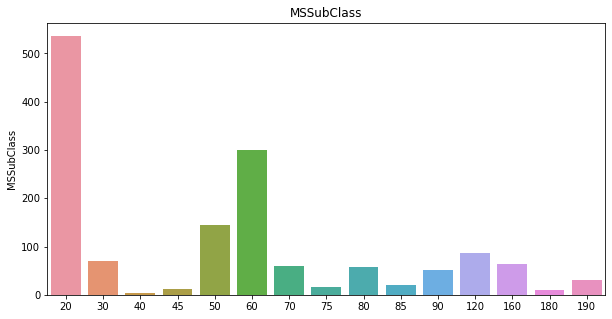

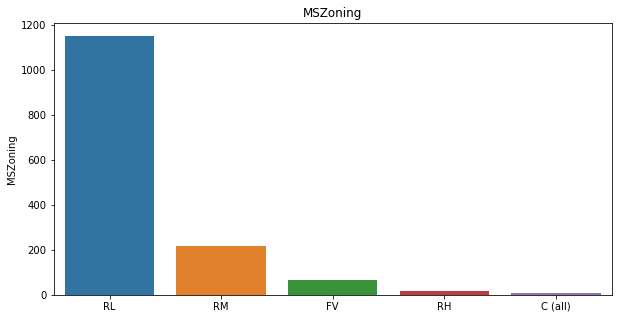

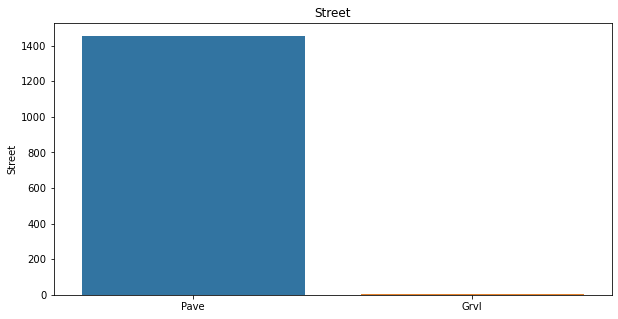

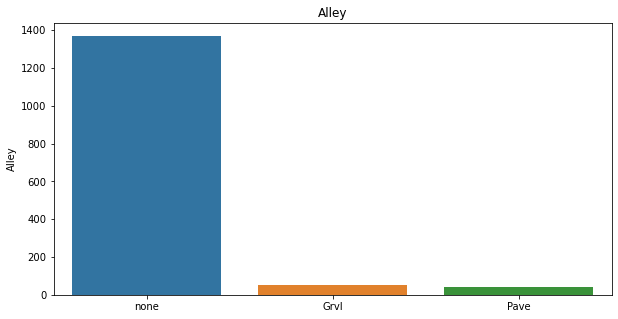

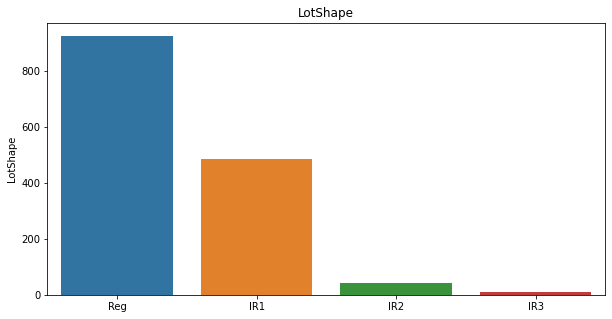

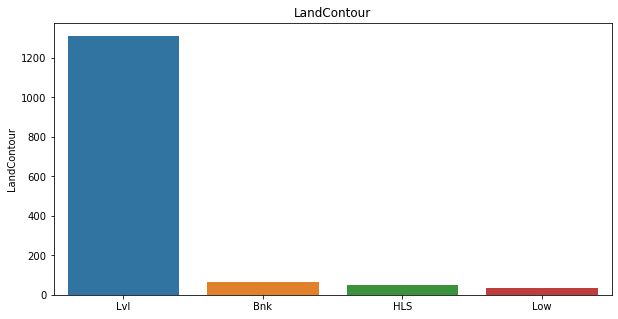

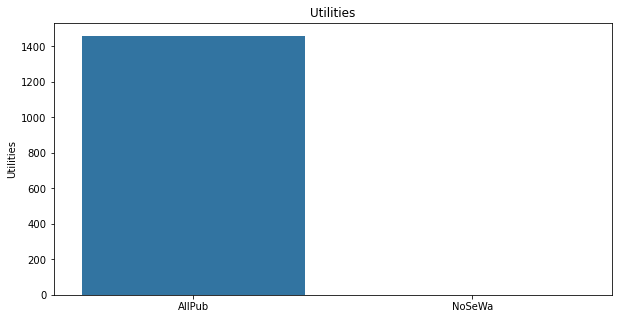

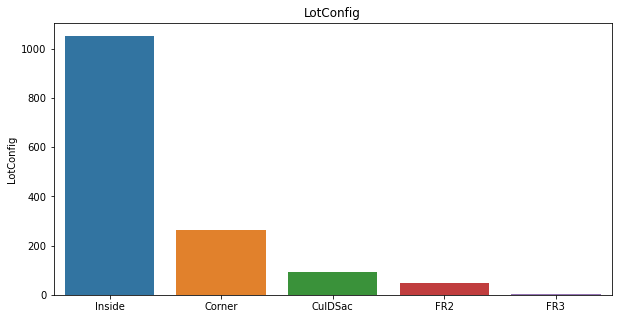

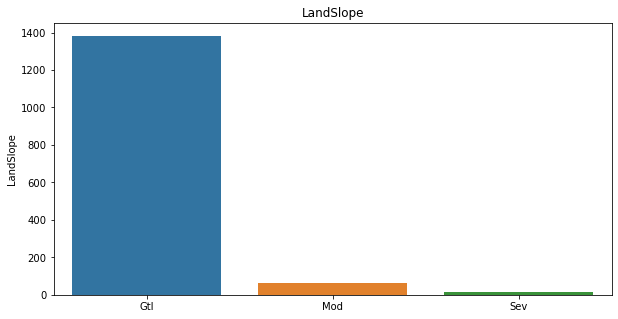

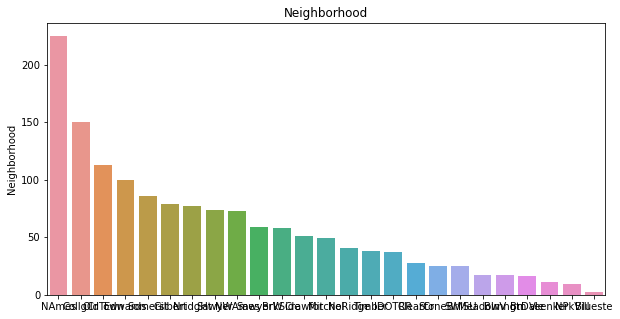

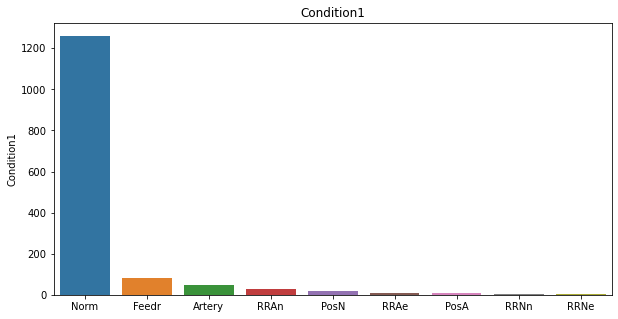

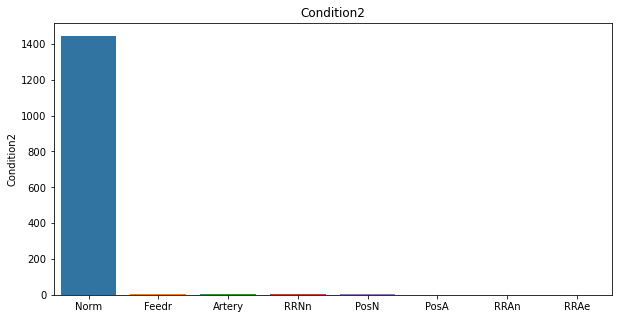

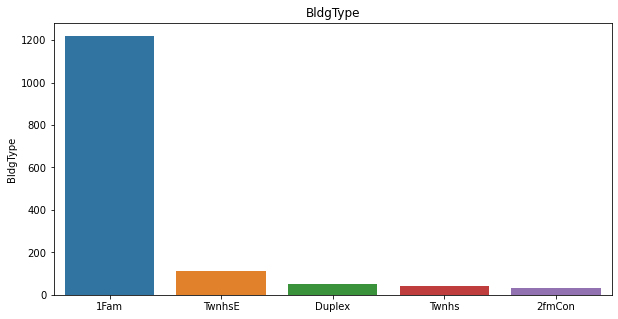

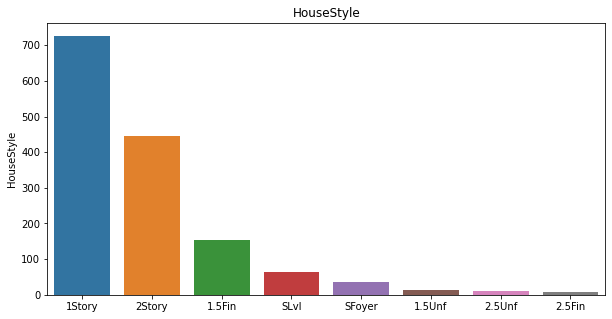

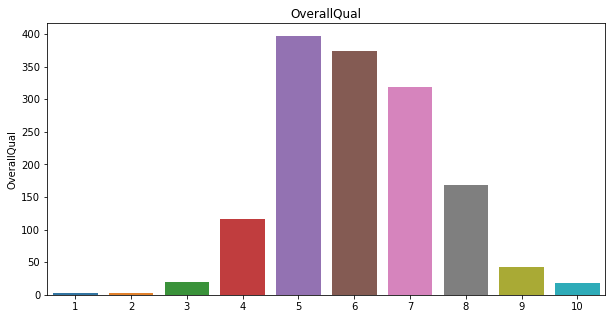

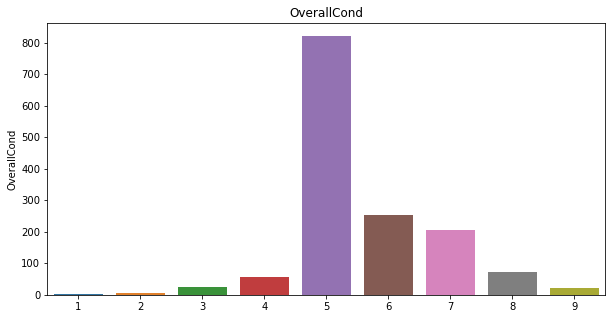

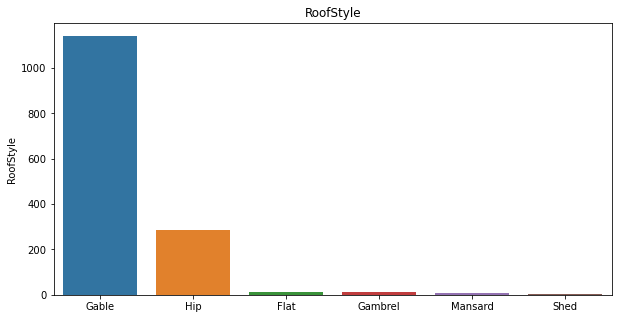

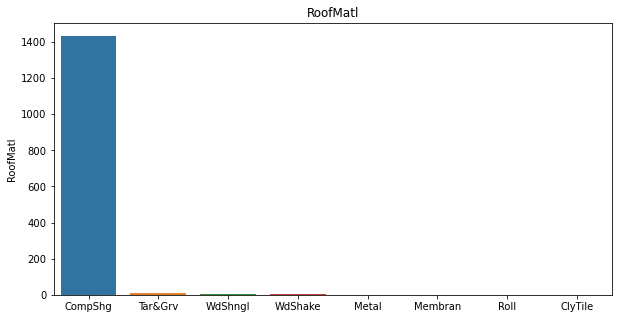

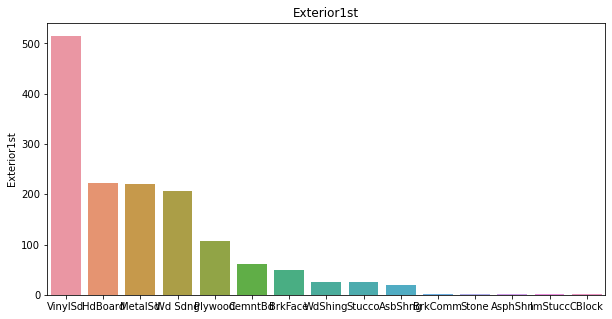

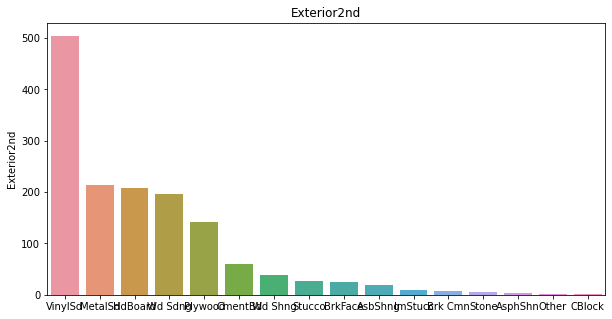

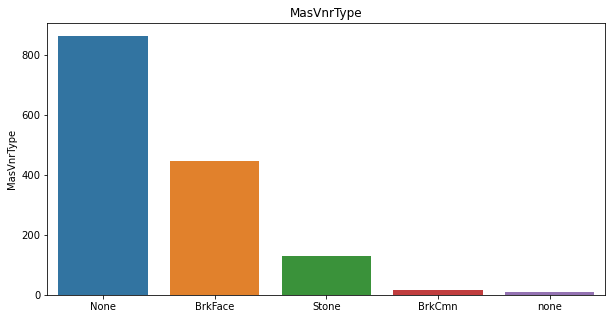

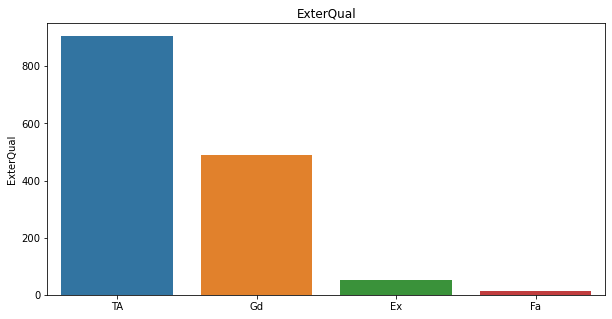

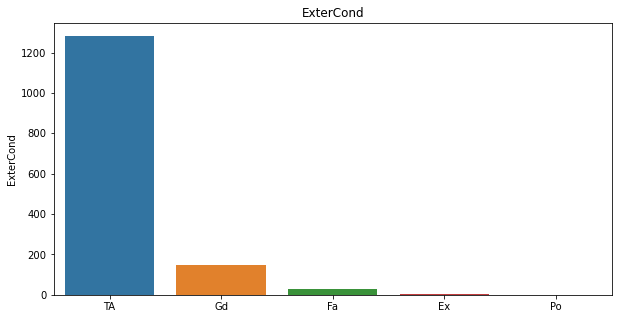

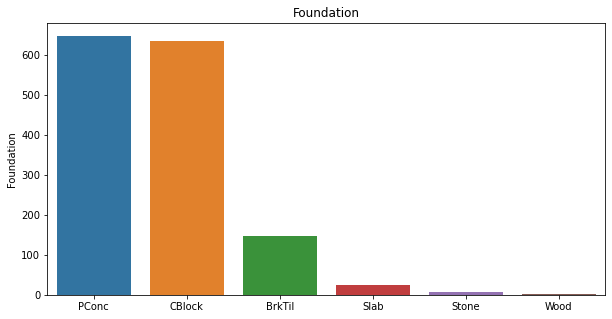

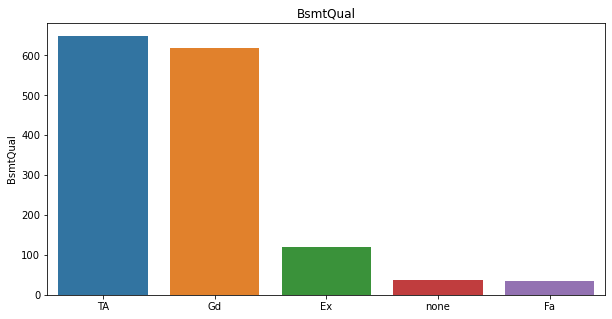

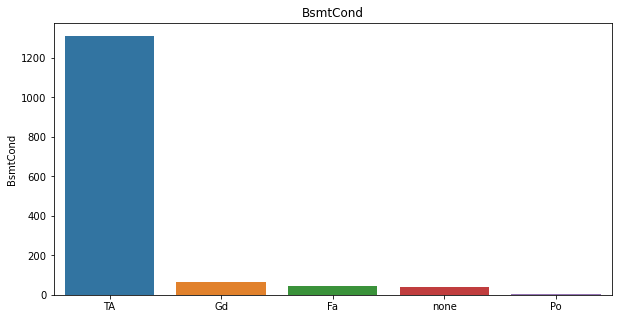

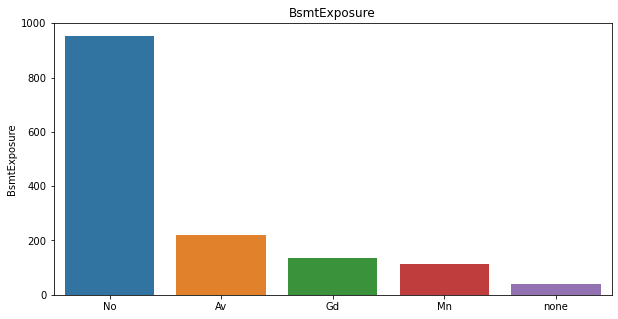

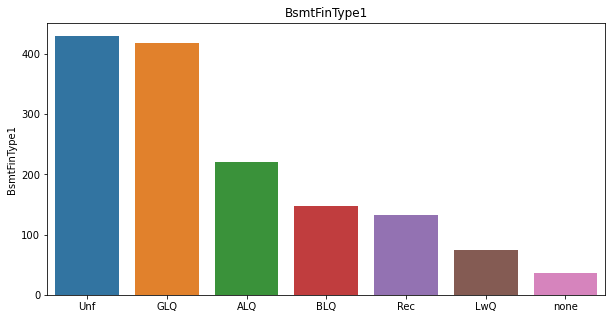

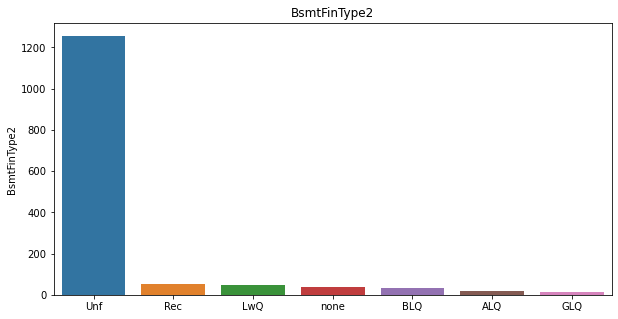

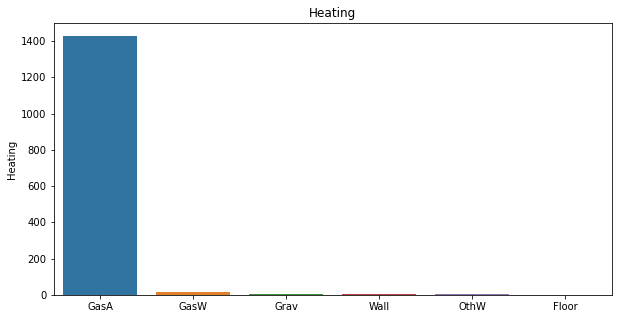

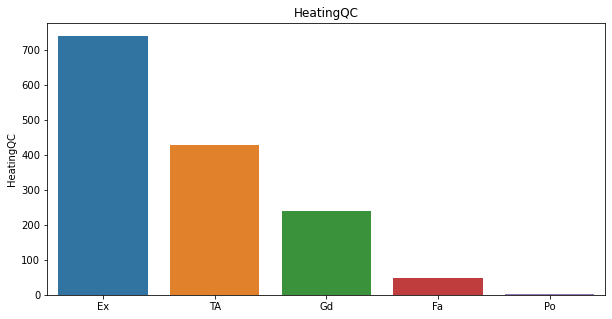

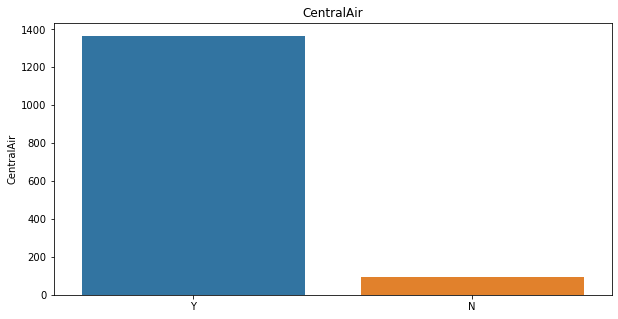

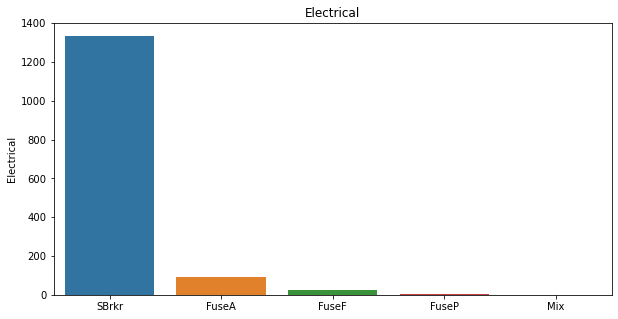

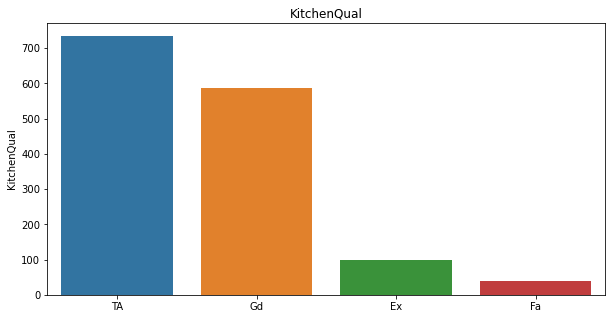

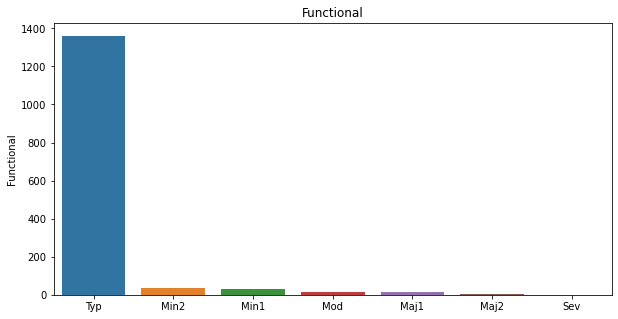

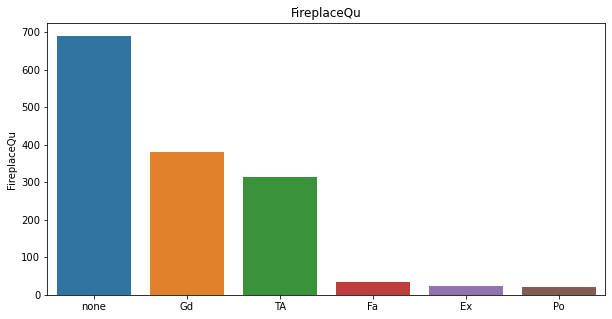

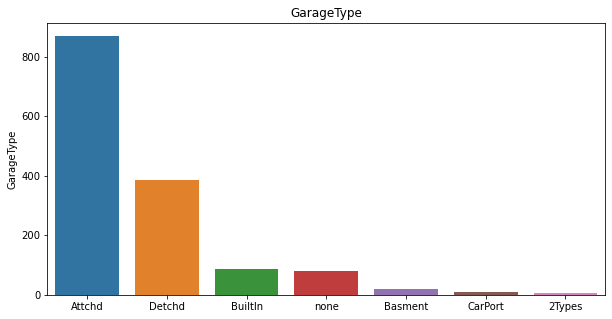

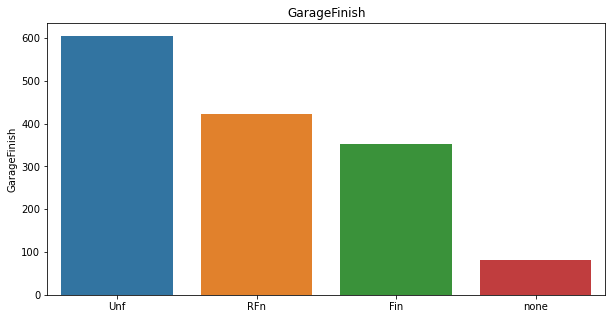

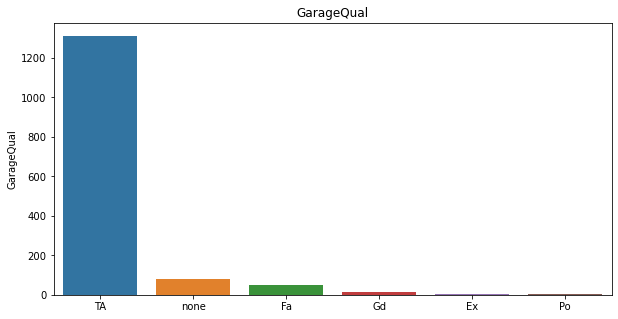

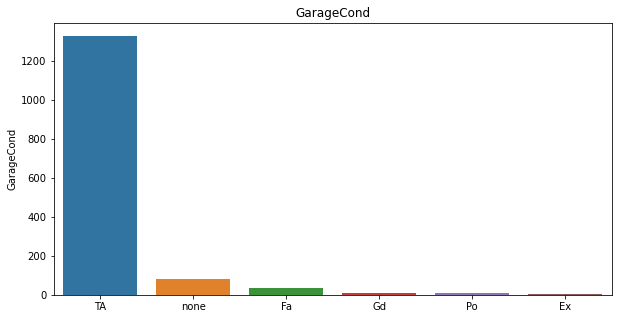

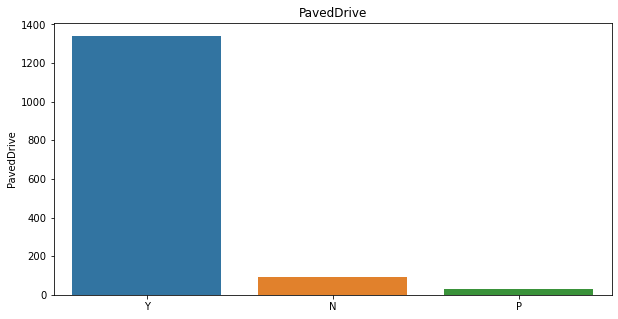

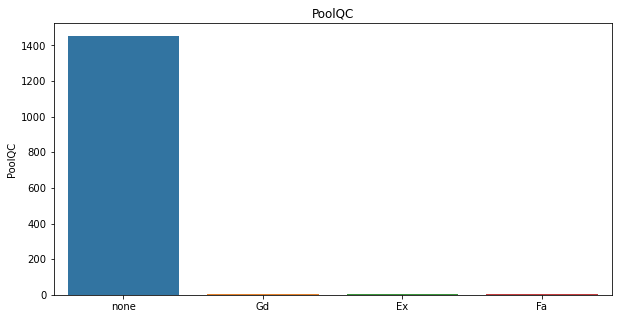

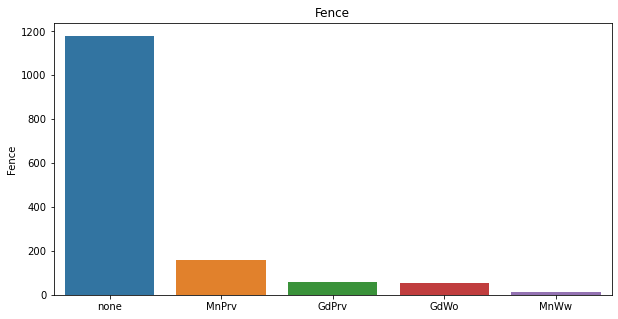

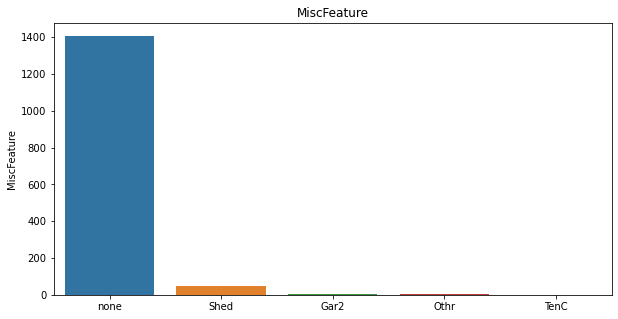

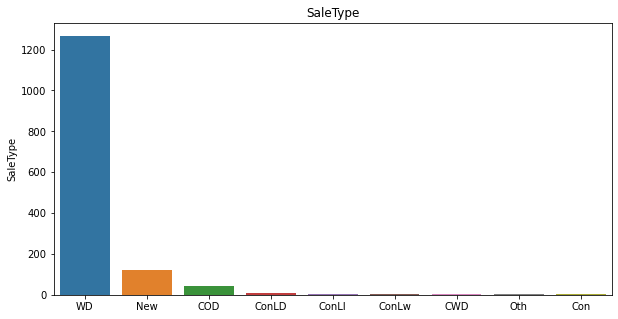

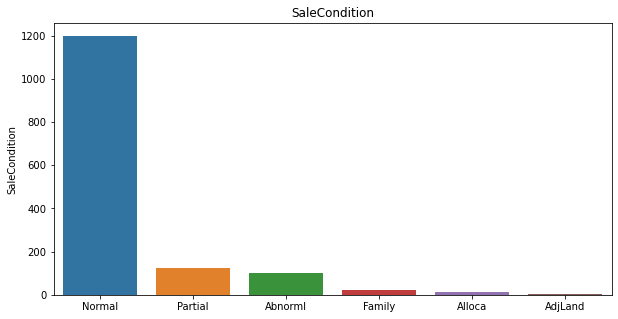

In [21]:
#Let's use bar plots to see the levels of categorical columns

for col in data_cat.columns:
    plt.figure(figsize=(10,5))
    plt.title(col)
    sns.barplot(data_cat[col].value_counts().index, data_cat[col].value_counts())
    plt.show()

**Findings:**

There is no column with single unique value that we could remove.

## 4.3. Bivariate Analysis

### 4.3.1. Target variable vs 'Neighborhood'

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

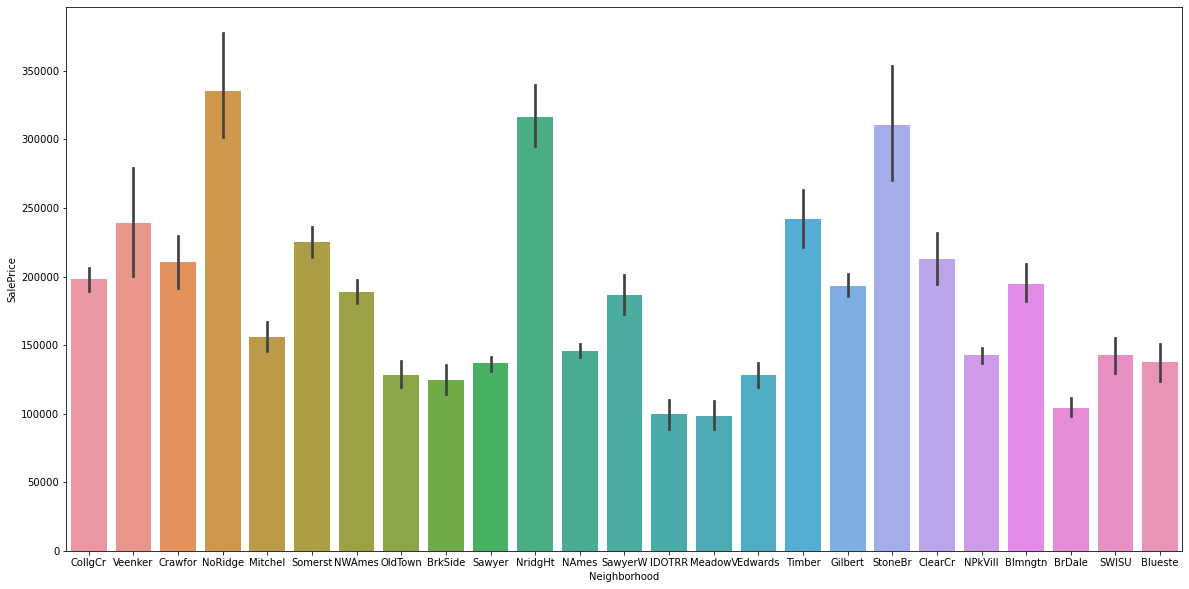

In [22]:
#Ploting 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 10))
sns.barplot(x='Neighborhood', y='SalePrice', data = data)

### 4.3.2. Target variable vs 'OverallCond'

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

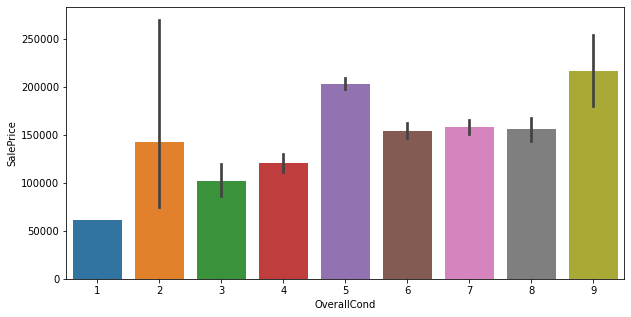

In [23]:
#Ploting 'Sale Price' with respect to 'OverallCond'

plt.figure(figsize=(10, 5))
sns.barplot(x='OverallCond', y='SalePrice', data = data)

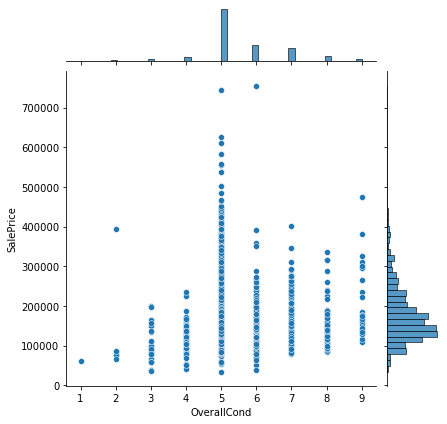

In [24]:
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

### 4.3.3. Target variable vs 'OverallQual'

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

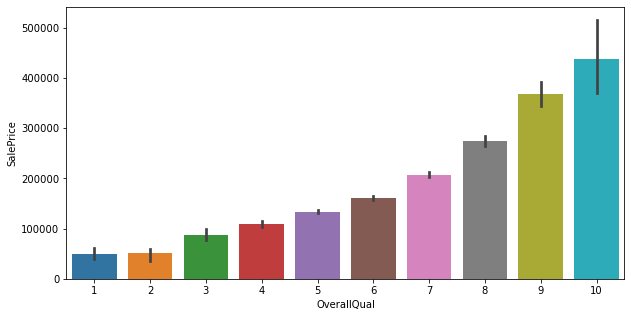

In [25]:
#Ploting 'Sale Price' with respect to 'OverallQual'

plt.figure(figsize=(10, 5))
sns.barplot(x='OverallQual', y='SalePrice', data = data)

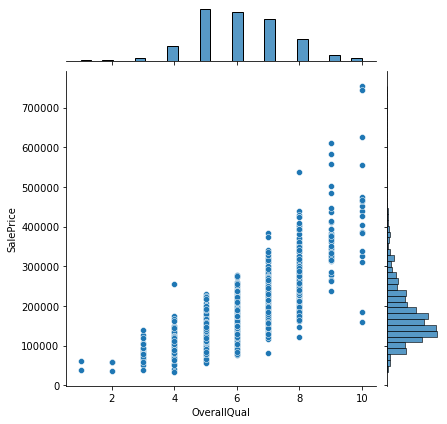

In [26]:
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

**Findings:**

The more house quality, the higher sale price.

## 4.4. Univariate Analysis

**Target Variable**

The target variable, in this case, is the column ‘SalePrice’ which tells the price of houses.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

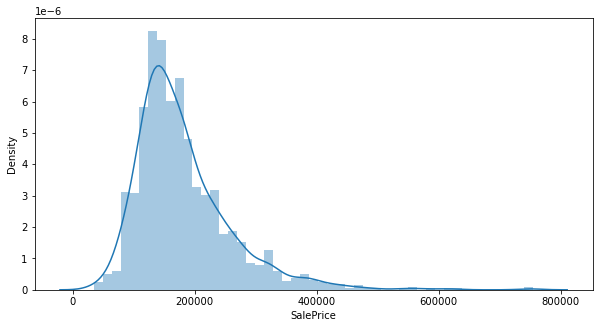

In [27]:
plt.figure(figsize=[10,5])
sns.distplot(data['SalePrice'])

We can easily notice that our target variable is right-skewed. Let's check the skewness of target variable:

In [28]:
data['SalePrice'].skew()

1.8828757597682129

The skewness > 1, so the target variable is highly skewed.

In [29]:
#Checking the kurtosis of target variable

data['SalePrice'].kurt()

6.536281860064529

The kurtosis > 1, so the distribution of target variable is highly peaked. In this case, we will log transform our target variable.

In [30]:
data['SalePrice'] = np.log(data['SalePrice'])

In [31]:
#Checking the skewness of target variable again

data['SalePrice'].skew()

0.12133506220520406

In [32]:
#Checking the kurtosis of target variable again

data['SalePrice'].kurt()

0.8095319958036296

Both skewness and kurtosis < 1 now.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

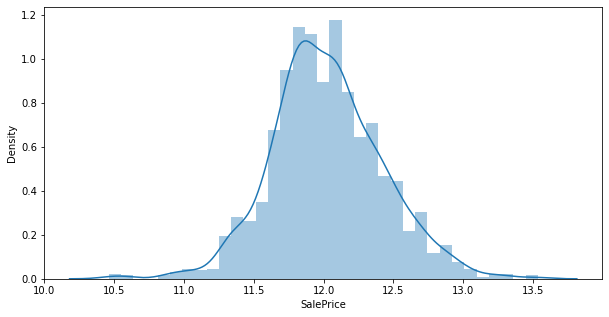

In [33]:
#Ploting the spread of transformed target variable

plt.figure(figsize=[10,5])
sns.distplot(data['SalePrice'])

Our target variable has normal distribution now.

In [34]:
# correlation matrix
cor = data_num.corr()
cor

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
Id             1.000000    -0.003381 -0.033226  -0.012713     -0.021998   
LotFrontage   -0.003381     1.000000  0.335957   0.120999      0.084550   
LotArea       -0.033226     0.335957  1.000000   0.014228      0.013788   
YearBuilt     -0.012713     0.120999  0.014228   1.000000      0.592855   
YearRemodAdd  -0.021998     0.084550  0.013788   0.592855      1.000000   
MasVnrArea    -0.051071     0.195830  0.103321   0.311600      0.176529   
BsmtFinSF1    -0.005024     0.232576  0.214103   0.249503      0.128451   
BsmtFinSF2    -0.005968     0.052237  0.111170  -0.049107     -0.067759   
BsmtUnfSF     -0.007940     0.119174 -0.002618   0.149040      0.181133   
TotalBsmtSF   -0.015415     0.381038  0.260833   0.391452      0.291066   
1stFlrSF       0.010496     0.434109  0.299475   0.281986      0.240379   
2ndFlrSF       0.005590     0.075686  0.050986   0.010308      0.140024   
LowQualFinSF  -0.044230     0.031873  0.004779  -0.183784     -0.062419   
GrLivArea      0.008273     0.385190  0.263116   0.199010      0.287389   
BsmtFullBath   0.002289     0.107226  0.158155   0.187599      0.119470   
BsmtHalfBath  -0.020155     0.006620  0.048046  -0.038162     -0.012337   
FullBath       0.005587     0.186561  0.126031   0.468271      0.439046   
HalfBath       0.006784     0.054190  0.014259   0.242656      0.183331   
BedroomAbvGr   0.037719     0.245232  0.119690  -0.070651     -0.040581   
KitchenAbvGr   0.002951    -0.005627 -0.017784  -0.174800     -0.149598   
TotRmsAbvGrd   0.027239     0.332619  0.190015   0.095589      0.191740   
Fireplaces    -0.019772     0.249295  0.271364   0.147716      0.112581   
GarageYrBlt   -0.000122     0.062380 -0.025865   0.777182      0.616444   
GarageCars     0.016570     0.281393  0.154871   0.537850      0.420622   
GarageArea     0.017634     0.339085  0.180403   0.478954      0.371600   
WoodDeckSF    -0.029643     0.088736  0.171698   0.224880      0.205726   
OpenPorchSF   -0.000477     0.141734  0.084774   0.188686      0.226298   
EnclosedPorch  0.002889     0.008057 -0.018340  -0.387268     -0.193919   
3SsnPorch     -0.046635     0.064654  0.020423   0.031355      0.045286   
ScreenPorch    0.001330     0.041063  0.043160  -0.050364     -0.038740   
PoolArea       0.057044     0.174567  0.077672   0.004950      0.005829   
MiscVal       -0.006242     0.005332  0.038068  -0.034383     -0.010286   
MoSold         0.021172     0.007370  0.001205   0.012398      0.021490   
YrSold         0.000712     0.004756 -0.014261  -0.013618      0.035743   
SalePrice     -0.021917     0.349876  0.263843   0.522897      0.507101   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id              -0.051071   -0.005024   -0.005968  -0.007940    -0.015415   
LotFrontage      0.195830    0.232576    0.052237   0.119174     0.381038   
LotArea          0.103321    0.214103    0.111170  -0.002618     0.260833   
YearBuilt        0.311600    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd     0.176529    0.128451   -0.067759   0.181133     0.291066   
MasVnrArea       1.000000    0.261256   -0.071330   0.113862     0.360067   
BsmtFinSF1       0.261256    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2      -0.071330   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF        0.113862   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF      0.360067    0.522396    0.104810   0.415360     1.000000   
1stFlrSF         0.339850    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF         0.173800   -0.137079   -0.099260   0.004469    -0.174512   
LowQualFinSF    -0.068628   -0.064503    0.014807   0.028167    -0.033245   
GrLivArea        0.388052    0.208171   -0.009640   0.240257     0.454868   
BsmtFullBath     0.083010    0.649212    0.158678  -0.422900     0.307351   
BsmtHalfBath     0.027403    0.067418    0.070948  -0.095804    -0.000315   
FullBath   

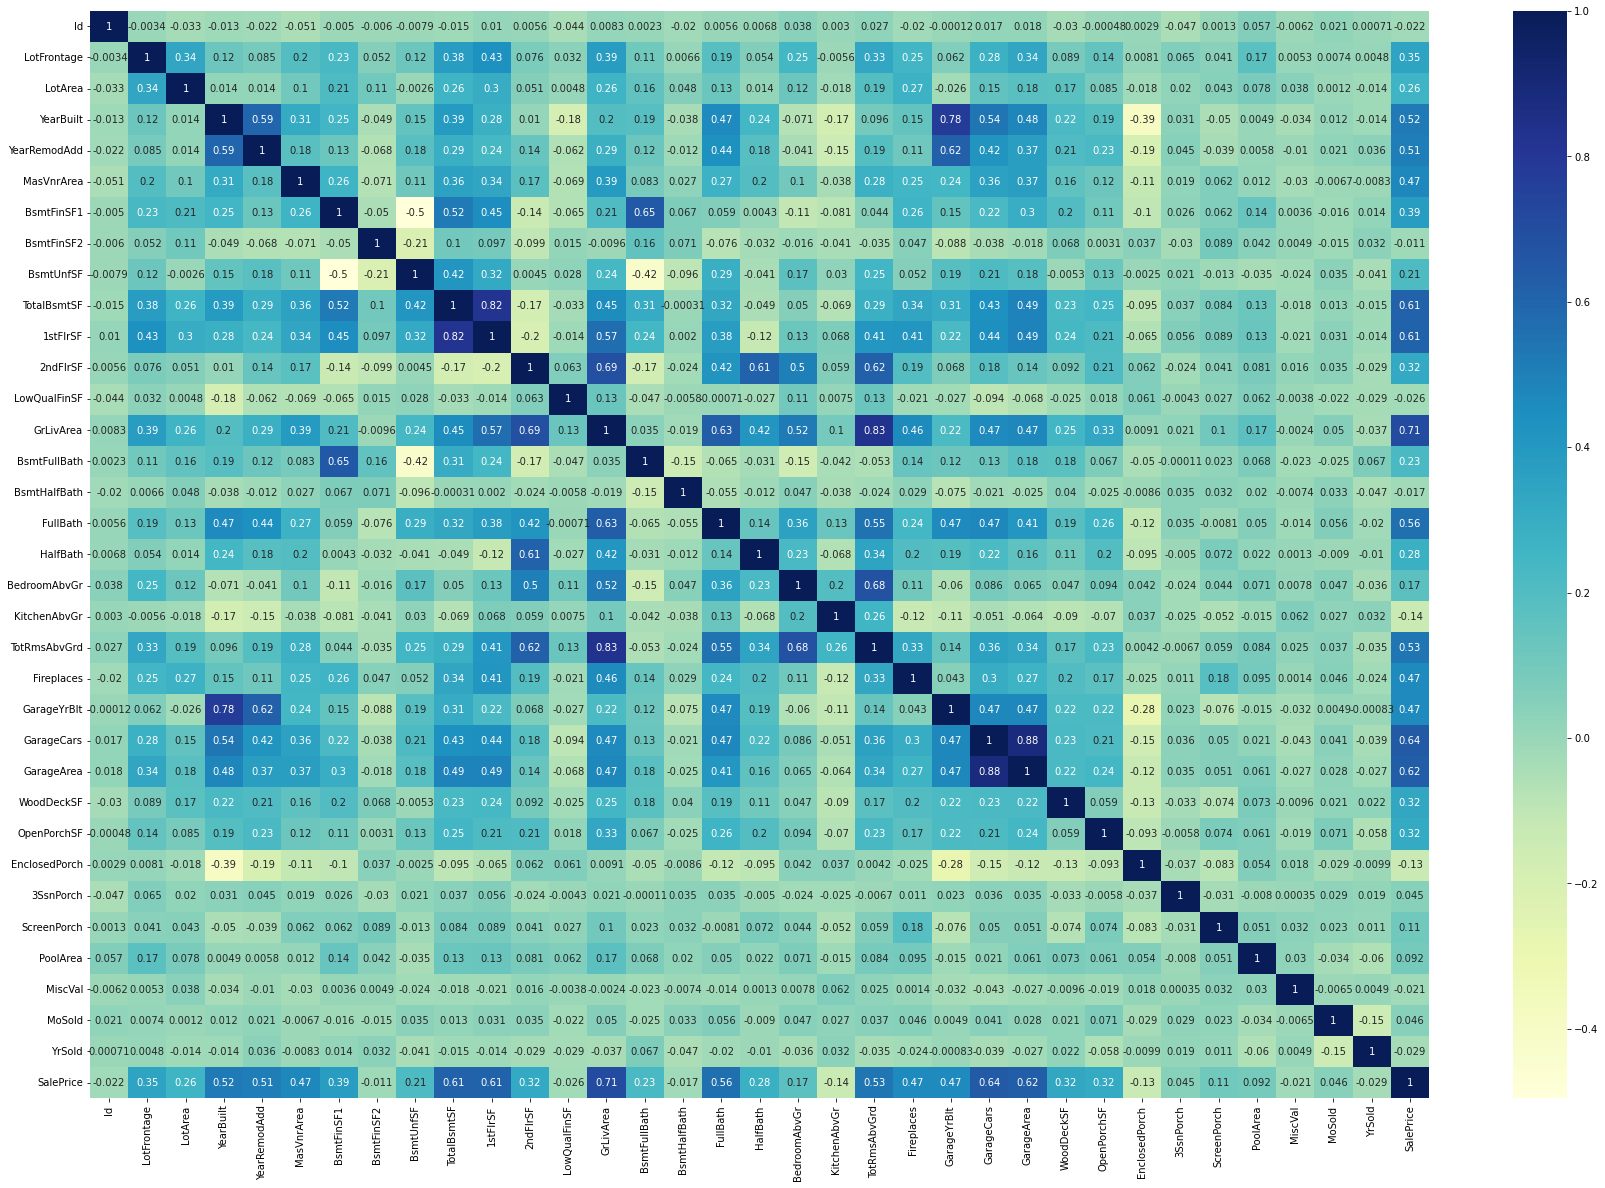

In [35]:
#Ploting heatmap to detect correlations among numerical variables

plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap='YlGnBu', annot=True)
plt.show()

**Findings:**

- Many variables are highly correlated with each other.
- Target variable is highly correlated with 'GrLivArea', 'GarageCars', and 'GarageArea'.
- Since there is multicollinearity among predictors in our data, we will use Ridge Regression for further analysis.

## 4.5. Feature Engineering/ Data Preprocessing

### 4.5.1. Drop columns

Before dropping columns, we will first check their predictive power

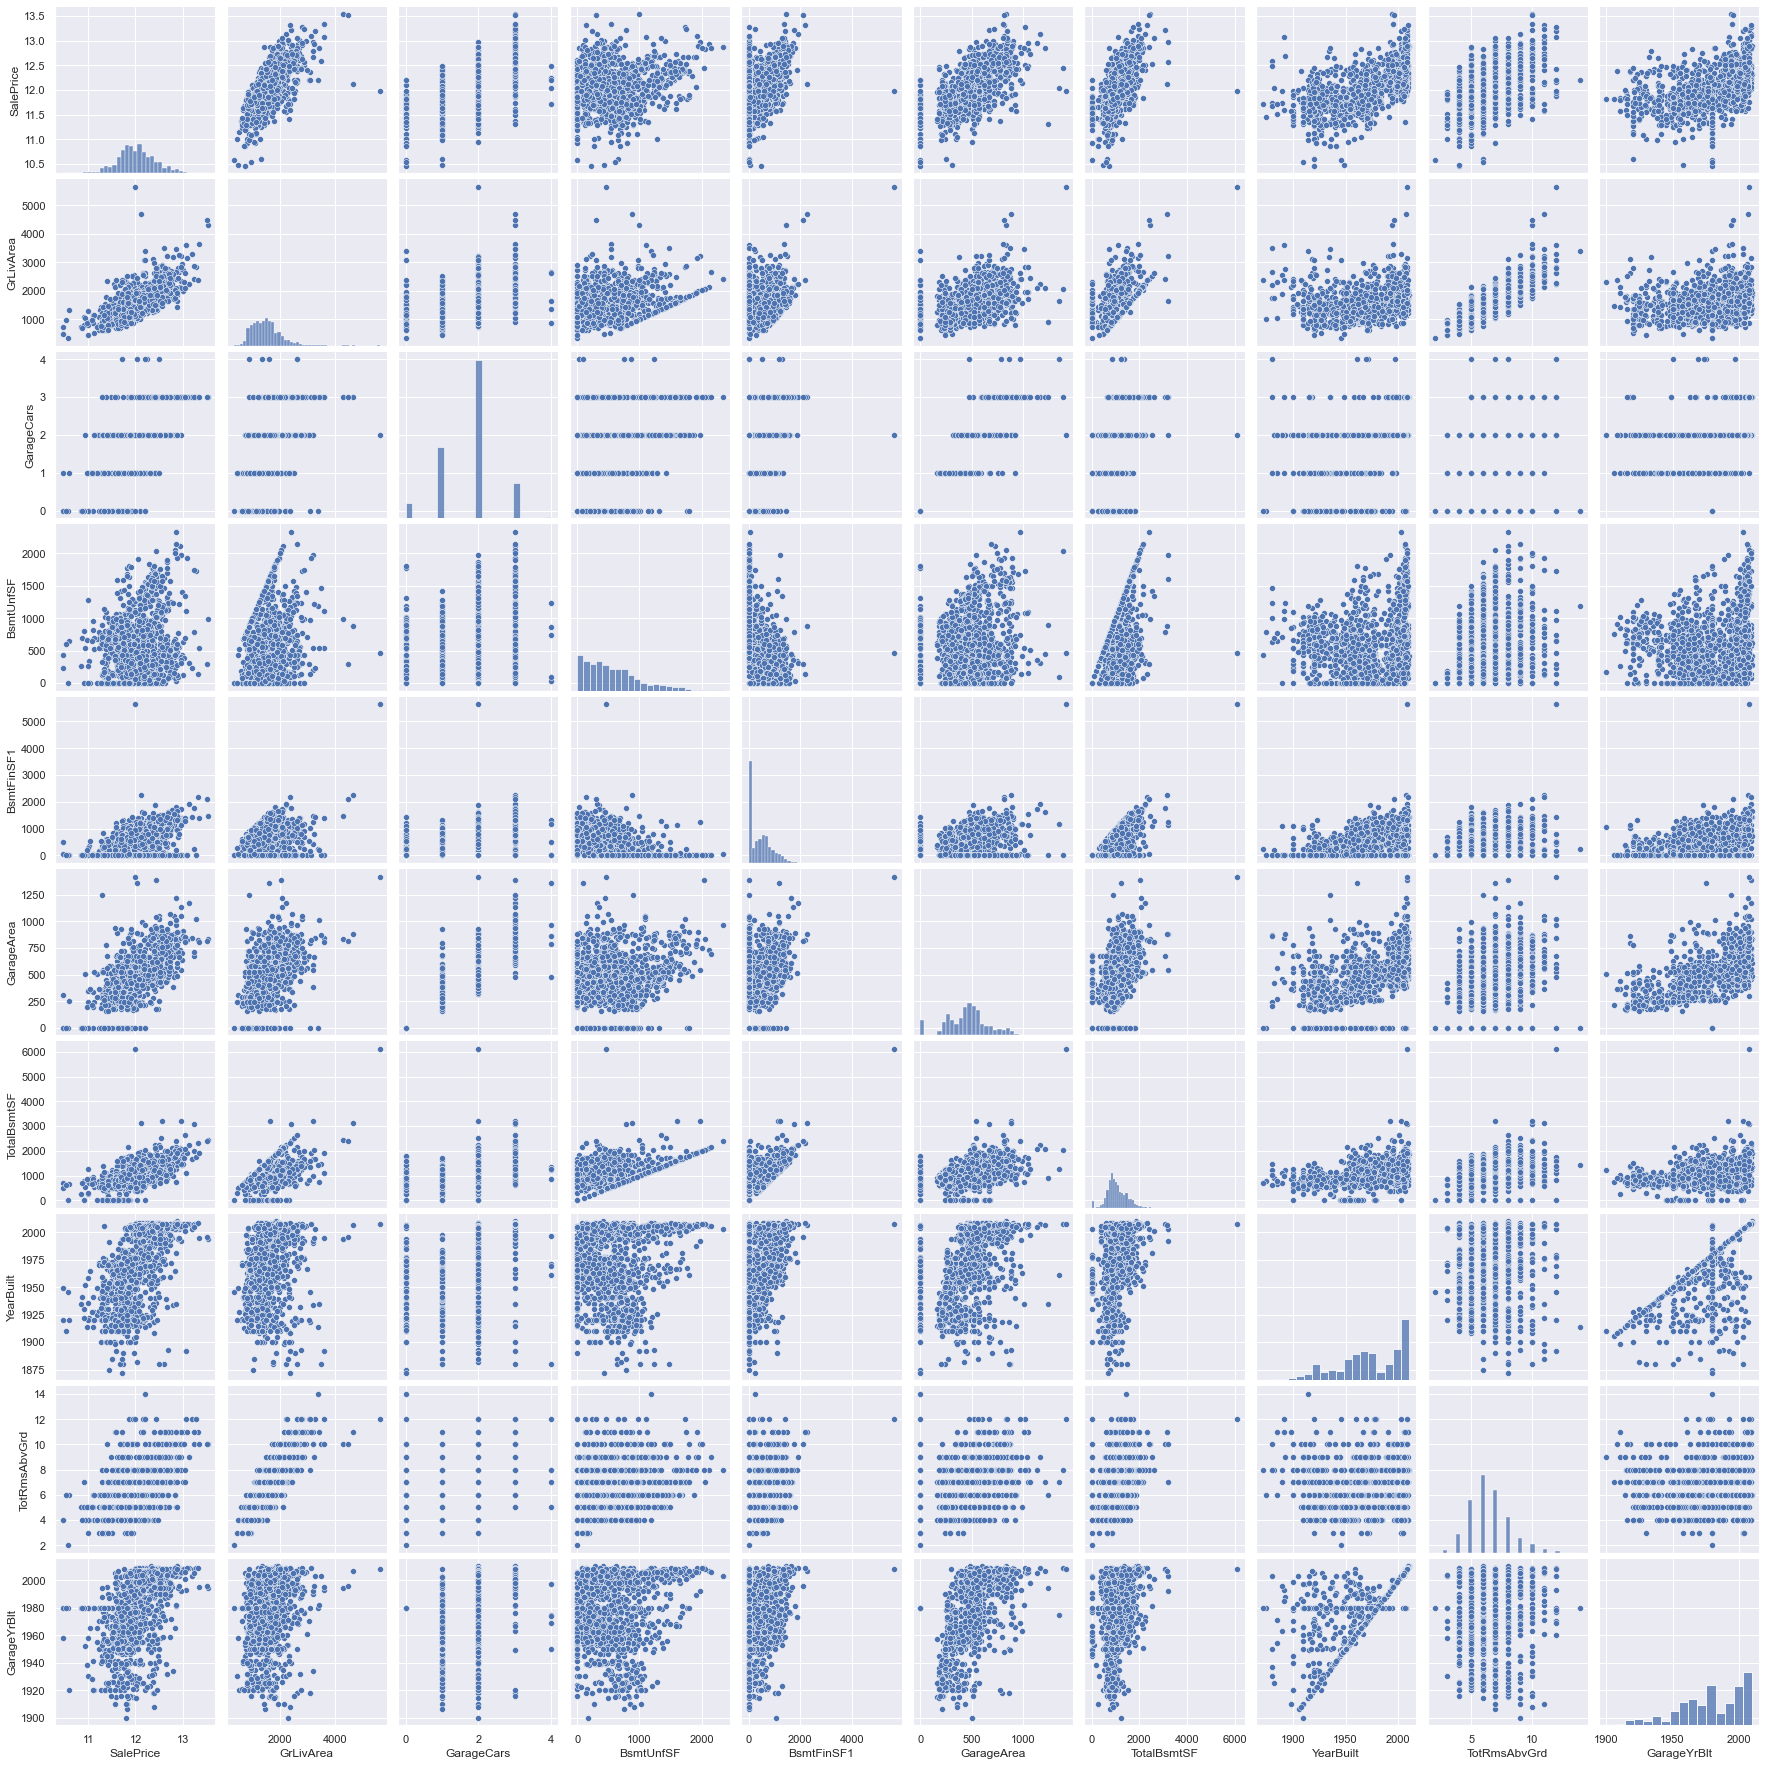

In [36]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols])
plt.show()

In [37]:
#Dropping columns that are correlated and not contributing to target variable

data = data.drop(['GarageCars'], axis = 1)     #Size of garage in car capacity
data = data.drop(['BsmtUnfSF'], axis = 1)      #Unfinished square feet of basement area
data = data.drop(['TotRmsAbvGrd'], axis = 1)   #Total rooms above grade (does not include bathrooms)
data = data.drop(['GarageYrBlt'], axis = 1)    #Year garage was built
data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  none      Reg   
1   2         20       RL         80.0     9600   Pave  none      Reg   
2   3         60       RL         68.0    11250   Pave  none      IR1   
3   4         70       RL         60.0     9550   Pave  none      IR1   
4   5         60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5       2003   
1       Norm     1Fam     1Story           6           8       1976   
2       Norm     1Fam     2Story           7           5       2001   
3       Norm     1Fam     2Story           7           5       1915   
4       Norm     1Fam     2Story           8           5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1        

**Dropping columns that show very low variance and thus not required for predictions:**

In [38]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [39]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [40]:
data = data.drop(['Street'], axis = 1)
data = data.drop(['Utilities'], axis = 1)

In [41]:
data.shape

(1460, 75)

### 4.5.2. Create statistic variable

In [42]:
#Creating new column for the age of the house

data['Age'] = data['YrSold'] - data['YearBuilt']

In [43]:
#Dropping the columns from which we created new one and unnecessary one

data.drop(['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [44]:
data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0     8450  none      Reg         Lvl   
1   2         20       RL         80.0     9600  none      Reg         Lvl   
2   3         60       RL         68.0    11250  none      IR1         Lvl   
3   4         70       RL         60.0     9550  none      IR1         Lvl   
4   5         60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF  \
0           No          GLQ         706          Unf           0          856   
1           Gd          ALQ         978          Unf           0         1262   
2           Mn          GLQ         486          Unf           0          920   
3           No          ALQ         216          Unf           0          756   
4           Av          GLQ         655          Unf           0         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ           1          TA     Attchd   

  GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0          RFn         548         TA         TA          Y           0   
1          RFn         460         TA         TA          Y         298   
2          RFn         608         TA 

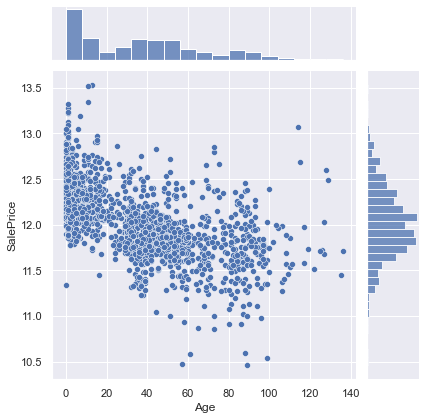

In [45]:
#Age vs SalePrice

sns.jointplot(x = data['Age'], y = data['SalePrice'])
plt.show()

**Findings:**

Property age is in inversely proportional to Saleprice.

## 4.6. Data Preparation

### 4.6.1. Handling outliers

In [46]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

<AxesSubplot:>

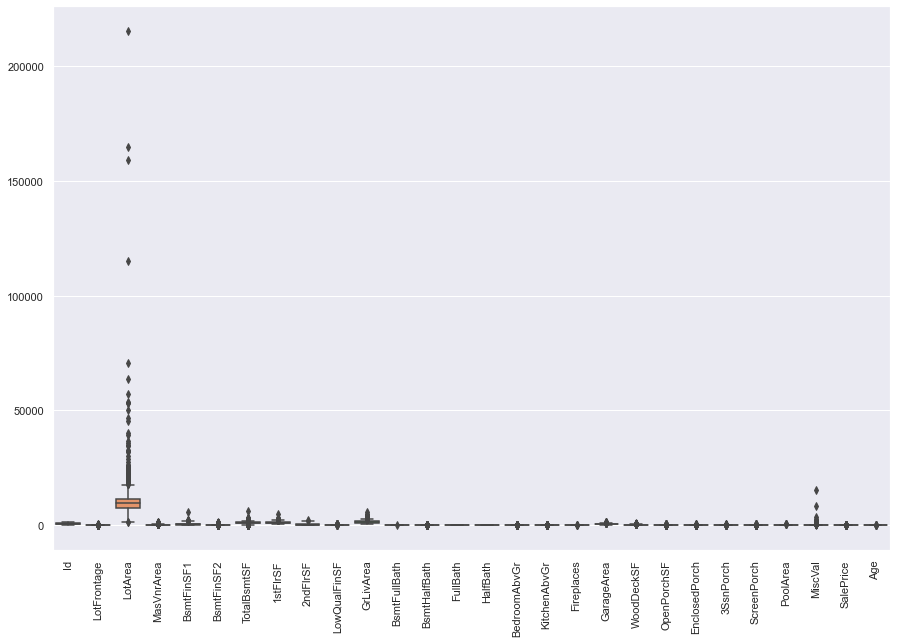

In [47]:
#Checking the boxplots to view outliers in numerical columns

data_num = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize = [15,10])
plt.xticks(rotation = 90)
sns.boxplot(data = data_num)

In [48]:
#Capping outliers to 5% at lower bound and 95% at upper bound

for col in data_num.columns:
    data_num[col][data_num[col] <= data_num[col].quantile(0.05)] = data_num[col].quantile(0.05)
    data_num[col][data_num[col] >= data_num[col].quantile(0.95)] = data_num[col].quantile(0.95)

<AxesSubplot:>

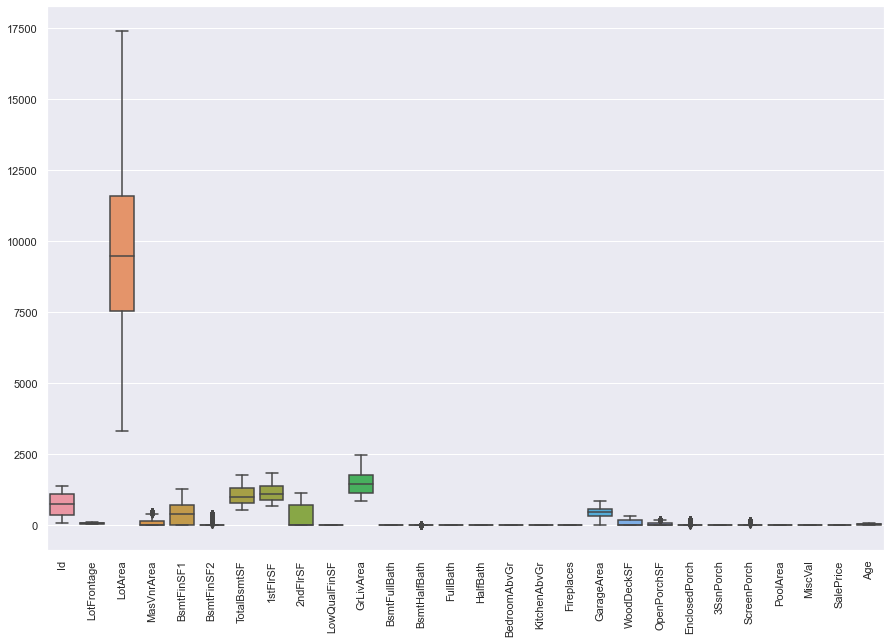

In [49]:
## Check the boxplots again to see if outliers have been treated

plt.figure(figsize = [15,10])
plt.xticks(rotation = 90)
sns.boxplot(data = data_num)

Outliers were removed from all numerical columns.

In [50]:
#Converting numeric type to a list to make it easier to work with

numeric_type = data.dtypes[(data.dtypes == 'int64') | (data.dtypes == float)] 
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age']


In [51]:
#Converting Categorical type to a list to make it easier to work with

categorical_type = data.dtypes[data.dtypes == object]
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### 4.6.2. Handling Dummy variables

We will create dummy variables for categorical columns

In [52]:
#Creating dummy variables

dummy = pd.get_dummies(data[['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']], drop_first=True )
dummy.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Pave  Alley_none  \
0            0            0            1            0           0           1   
1            0            0            1            0           0           1   
2            0            0            1            0           0           1   
3            0            0            1            0           0           1   
4            0            0            1            0           0           1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0  

In [53]:
#Concatenating the dummy data to the dataframe

data = pd.concat([data, dummy], axis=1)
data.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1         60       RL         65.0     8450  none      Reg         Lvl   
1   2         20       RL         80.0     9600  none      Reg         Lvl   
2   3         60       RL         68.0    11250  none      IR1         Lvl   
3   4         70       RL         60.0     9550  none      IR1         Lvl   
4   5         60       RL         84.0    14260  none      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF  \
0           No          GLQ         706          Unf           0          856   
1           Gd          ALQ         978          Unf           0         1262   
2           Mn          GLQ         486          Unf           0          920   
3           No          ALQ         216          Unf           0          756   
4           Av          GLQ         655          Unf           0         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  ...  FireplaceQu_Fa FireplaceQu_Gd  \
0             1          Gd        Typ  ...               0              0   
1             1          TA        Typ  ...               0              0   
2             1          Gd        Typ  ...               0              0   
3             1          Gd        Typ  ...               0              1   
4             1          Gd        Typ  ...               0              0   

  FireplaceQu_Po FireplaceQu_TA  FireplaceQu_none GarageType_Attchd  \
0              0              0                 1                 1   
1              0              1                 0                 1   
2              0              1             

In [54]:
#Dropping dummy-created columns

data = data.drop(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], axis = 1)
data.head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
0   1         65.0     8450       196.0         706           0          856   
1   2         80.0     9600         0.0         978           0         1262   
2   3         68.0    11250       162.0         486           0          920   
3   4         60.0     9550         0.0         216           0          756   
4   5         84.0    14260       350.0         655           0         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
0         2         1             3             1           0         548   
1         2         0             3             1           1         460   
2         2         1             3             1           1         608   
3         1         0             3             1           1         642   
4         2         1             4             1           1         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0        0  12.247694    5              0              0              0   
1        0  12.109011   31              0              0              0   
2        0  12.317167    7              0              0              0   
3        0  11.849398   91              0              0              0   
4        0  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   
4               0               0            0            0            1   

   MSZoning_RM  Alley_Pave  Alley_none  LotShape_IR2  LotShape_IR3  ...  \
0            0           0           1             0             0  ...   
1            0           0           1             0             0  ...   
2            0           0           1             0             0  ...   
3            0         

### 4.6.3. Splitting the data into train and test set

In [55]:
from sklearn.model_selection import train_test_split

x = data.drop(['Id','SalePrice'], axis=1)
x.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
0         65.0     8450       196.0         706           0          856   
1         80.0     9600         0.0         978           0         1262   
2         68.0    11250       162.0         486           0          920   
3         60.0     9550         0.0         216           0          756   
4         84.0    14260       350.0         655           0         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
0         2         1             3             1           0         548   
1         2         0             3             1           1         460   
2         2         1             3             1           1         608   
3         1         0             3             1           1         642   
4         2         1             4             1           1         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0        0    5              0              0              0              0   
1        0   31              0              0              0              0   
2        0    7              0              0              0              0   
3        0   91              0              0              0              0   
4        0    8              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0            0            0            1            0   
1               0            0            0            1            0   
2               0            0            0            1            0   
3               0            0            0            1            0   
4               0            0            0            1            0   

   Alley_Pave  Alley_none  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           0           1             0             0             1   
1           0           1             0             0             1   
2           0           1             0             0             0   
3           0           1             0            

In [56]:
y = data['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [57]:
#Splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.6.4. Rescaling the Features

For the model to be easily interpretable, all variables must be on the same scale. We can use standardization or normalizing to ensure that the units of the computed coefficients are all on the same scale.

- Min-Max scaling (Normalisation): Between 0 and 1
- Standardisation: mean-0, sigma-1

The benefit of Standardisation over Min-Max scaling is that it does not compress the data between a specific range. This is helpful, especially if there is an outlier data point. Because our dataset no longer contain significant outliers, we'll use Normalisation.

In [58]:
#Creating a list of numerical columns to be scaled

num_cols = list(x_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Age']

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.fit_transform(x_test[num_cols])

In [60]:
x_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
210     -0.131502 -0.473765   -0.650325    0.082728   -0.293313    -0.430911   
318      1.206192 -0.056845    1.158620    1.341089   -0.293313     0.621579   
239     -1.003912 -0.169324   -0.650325   -0.824068   -0.293313    -0.712011   
986     -0.596787 -0.502297   -0.650325   -1.051979   -0.293313    -1.256778   
1416    -0.538627  0.082905   -0.650325   -1.051979   -0.293313    -0.620490   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
210  -0.765065 -0.787597           0.0  -1.252044      1.160658      -0.24987   
318   0.511914  2.140556           0.0   2.140952      1.160658      -0.24987   
239  -0.930972  0.795996           0.0  -0.065828     -0.861580      -0.24987   
986  -0.420683  0.669584           0.0   0.215969     -0.861580      -0.24987   
1416  0.195183  1.611926           0.0   1.463114     -0.861580      -0.24987   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
210  -1.106526 -0.763509     -1.329384           0.0   -0.939097   -2.217786   
318   0.903729  1.309743      1.710484           0.0    0.645726    0.867506   
239  -1.106526  1.309743      0.190550           0.0    0.645726   -1.183084   
986  -1.106526 -0.763509     -1.329384           0.0   -0.939097   -1.018473   
1416  0.903729 -0.763509      1.710484           0.0   -0.939097    0.416000   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
210    -0.801765    -0.709347       1.150231        0.0    -0.285455   
318     2.271410     0.197980       1.910043        0.0    -0.285455   
239    -0.801765     1.407748      -0.369395        0.0    -0.285455   
986     2.271410    -0.709347      -0.369395        0.0    -0.285455   
1416   -0.801765    -0.709347       1.435160        0.0    -0.285455   

      PoolArea  MiscVal       Age  MSSubClass_30  MSSubClass_40  \
210        0.0      0.0  1.618731              1              0   
318        0.0      0.0 -0.690073              0              0   
239        0.0      0.0  0.998456              0              0   
986        0.0      0.0  1.894409              0              0   
1416       0.0      0.0  1.894409              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
210               0              0              0              0   
318               0              0              1              0   
239               0              1              0              0   
986               0              1              0              0   
1416              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
210               0              0              0              0   
318               0              0              0              0   
239               0              0              0              0   
986               0              0              0              0   
1416              0              0              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
210                0               0               0               0   
318                0               0               0               0   
239                0               0               0               0   
986                0               0               0               0   
1416               0               0               0               1   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Pave  \
210             0            0            1            0           0   
318             0            0            1            0           0   
239             0            0            1            0           0   
986             0            0            0            1           0   
1416            0            0            0            1           0   

      Alley_none  LotShape_IR2  LotSh

In [61]:
x_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  \
1436    -0.584661 -0.173195   -0.667177    0.468033   -0.281532    -0.473033   
57       1.147233  0.114799   -0.667177   -1.030454   -0.281532    -0.483360   
780     -0.405499 -0.295688   -0.392476   -1.030454   -0.281532     0.489962   
382      0.550029 -0.146519   -0.667177   -1.030454   -0.281532    -0.279402   
1170     0.370867 -0.077379   -0.667177    0.239367   -0.281532     0.125934   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1436 -0.795529 -0.810589           0.0  -1.302503     -0.788811     -0.229967   
57   -0.806680  1.148506           0.0   0.406251     -0.788811     -0.229967   
780   0.288934 -0.810589           0.0  -0.525978     -0.788811     -0.229967   
382  -0.586442  1.143950           0.0   0.559959     -0.788811     -0.229967   
1170 -0.087422 -0.810589           0.0  -0.795466      1.267731     -0.229967   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  \
1436 -1.090871 -0.796447      0.151107           0.0   -1.011862    0.238541   
57    0.916698  1.255576      0.151107           0.0   -1.011862    0.409443   
780   0.916698 -0.796447      0.151107           0.0    0.548686   -0.343449   
382   0.916698  1.255576      0.151107           0.0   -1.011862    0.751247   
1170 -1.090871 -0.796447      0.151107           0.0    0.548686   -0.546683   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1436   -0.836852    -0.690864      -0.336016        0.0    -0.296819   
57     -0.836852     0.362909      -0.336016        0.0    -0.296819   
780     1.160895    -0.374732      -0.336016        0.0    -0.296819   
382     0.470764     0.106993      -0.336016        0.0    -0.296819   
1170    1.006523    -0.690864      -0.336016        0.0    -0.296819   

      PoolArea  MiscVal       Age  MSSubClass_30  MSSubClass_40  \
1436       0.0      0.0  0.001932              0              0   
57         0.0      0.0 -1.197123              0              0   
780        0.0      0.0 -0.844460              0              0   
382        0.0      0.0 -1.232390              0              0   
1170       0.0      0.0 -0.174399              0              0   

      MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
1436              0              0              0              0   
57                0              0              1              0   
780               0              0              0              0   
382               0              0              1              0   
1170              0              0              0              0   

      MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
1436              0              0              0              0   
57                0              0              0              0   
780               0              0              0              0   
382               0              0              0              0   
1170              0              1              0              0   

      MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
1436               0               0               0               0   
57                 0               0               0               0   
780                0               0               0               0   
382                0               0               0               0   
1170               0               0               0               0   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Alley_Pave  \
1436            0            0            1            0           0   
57              0            0            1            0           0   
780             0            0            1            0           0   
382             0            0            1            0           0   
1170            0            0            1            0           0   

      Alley_none  LotShape_IR2  LotSh

# V. Building Model

## 5.1. Linear Regression and RFE

We will check the model using Linear Regression and RFE to see whether Linear Regression is the best fit our case study.

In [62]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [63]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select = 100)
rfe = rfe.fit(x_train, y_train)

In [64]:
rfe.support_

array([False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,

In [65]:
#List of ranking variables selected

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 149),
 ('LotArea', False, 37),
 ('MasVnrArea', False, 175),
 ('BsmtFinSF1', False, 66),
 ('BsmtFinSF2', False, 146),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', False, 88),
 ('BsmtFullBath', False, 136),
 ('BsmtHalfBath', False, 178),
 ('FullBath', False, 122),
 ('HalfBath', False, 130),
 ('BedroomAbvGr', False, 172),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', False, 161),
 ('GarageArea', False, 22),
 ('WoodDeckSF', False, 143),
 ('OpenPorchSF', False, 153),
 ('EnclosedPorch', False, 166),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', False, 162),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('Age', True, 1),
 ('MSSubClass_30', False, 57),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', False, 176),
 ('MSSubClass_60', False, 125),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', False, 7),
 ('MSSubClass_80', False, 144),
 ('MSSubClass_85', False, 80),
 ('MSSubCl

In [66]:
#Columns where RFE support is True

cols = x_train.columns[rfe.support_]
cols

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'KitchenAbvGr',
       '3SsnPorch', 'PoolArea', 'MiscVal', 'Age', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_70', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RH', 'MSZoning_RL',
       'Alley_Pave', 'Neighborhood_Blueste', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'HouseStyle_1.5Unf', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
    

In [67]:
#Columns where RFE support is False

x_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'MiscFeature_TenC', 'MiscFeature_none', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=179)

In [68]:
x_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'MiscFeature_TenC', 'MiscFeature_none', 'SaleType_CWD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=179)

In [69]:
#Creating x_test dataframe with RFE selected variables

x_train_rfe = x_train[col]

In [70]:
x_train_rfe = pd.DataFrame(x_train[col])

In [71]:
x_train_rfe.head()

Age
210   1.618731
318  -0.690073
239   0.998456
986   1.894409
1416  1.894409

In [72]:
x_train_rfe.shape

(1021, 1)

In [73]:
#Prediction

y_train_pred = lm.predict(x_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9583269424685074

In [74]:
y_test_pred = lm.predict(x_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.6380504609311234e+19

Since the Test R2 is too low, we will check for some alternate methods of Regression

In [75]:
#Checking the dimension of x_train & y_train

print('x_train', x_train.shape)
print('y_train', y_train.shape)

x_train (1021, 279)
y_train (1021,)


## 5.2. Ridge Regression

We will run a cross validation on a list of alphas to find the optimum value of alpha

In [76]:
#List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

#Cross validation

folds = 5
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
#The optimal value of alpha

ridgeCV.best_params_

{'alpha': 10.0}

Our optimum value of alpha is 10. Hence, we will build a ridge regression model using this value.

In [78]:
#The results of cross validation

ridgeCV.cv_results_

{'mean_fit_time': array([0.02493362, 0.02094445, 0.0211432 , 0.03390961, 0.02393489,
        0.0171535 , 0.01695766, 0.02852273, 0.0211432 , 0.01914954,
        0.03151956, 0.01874948, 0.01894894, 0.01675415, 0.04009619,
        0.03889589, 0.01655674, 0.01795168, 0.01575756, 0.01575661,
        0.01376467, 0.02672858, 0.01475759, 0.02413597, 0.03211355,
        0.05006566, 0.0173532 , 0.0261301 ]),
 'std_fit_time': array([0.00710796, 0.00109319, 0.00097723, 0.01150974, 0.0072692 ,
        0.00039828, 0.00393407, 0.02418036, 0.00298516, 0.00146627,
        0.02671836, 0.00203424, 0.00282065, 0.00132317, 0.0447836 ,
        0.04289651, 0.00135251, 0.00373257, 0.00146446, 0.00284925,
        0.00193423, 0.0210852 , 0.00213244, 0.00986013, 0.00324106,
        0.04252567, 0.00101716, 0.01836068]),
 'mean_score_time': array([0.00977411, 0.0205442 , 0.00778089, 0.0089746 , 0.00857534,
        0.00698128, 0.00577941, 0.00658298, 0.00758128, 0.00758018,
        0.006778  , 0.00698128, 0.007979

In [79]:
ridgeCV_results = pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results = ridgeCV_results[ridgeCV_results['param_alpha']<=10]
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.024934      0.007108         0.009774        0.003645      0.0001   
1        0.020944      0.001093         0.020544        0.024654       0.001   
2        0.021143      0.000977         0.007781        0.000746        0.01   
3        0.033910      0.011510         0.008975        0.002089        0.05   
4        0.023935      0.007269         0.008575        0.002327         0.1   
5        0.017154      0.000398         0.006981        0.000632         0.2   
6        0.016958      0.003934         0.005779        0.000976         0.3   
7        0.028523      0.024180         0.006583        0.002239         0.4   
8        0.021143      0.002985         0.007581        0.000488         0.5   
9        0.019150      0.001466         0.007580        0.000486         0.6   
10       0.031520      0.026718         0.006778        0.001473         0.7   
11       0.018749      0.002034         0.006981        0.001093         0.8   
12       0.018949      0.002821         0.007980        0.000894         0.9   
13       0.016754      0.001323         0.005984        0.001093         1.0   
14       0.040096      0.044784         0.006977        0.000634         2.0   
15       0.038896      0.042897         0.006781        0.000399         3.0   
16       0.016557      0.001353         0.005583        0.001620         4.0   
17       0.017952      0.003733         0.007180        0.001466         5.0   
18       0.015758      0.001464         0.005982        0.001545         6.0   
19       0.015757      0.002849         0.005585        0.001017         7.0   
20       0.013765      0.001934         0.003788        0.000747         8.0   
21       0.026729      0.021085         0.006183        0.000399         9.0   
22       0.014758      0.002132         0.005984        0.001261        10.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.094421          -0.089617   
1    {'alpha': 0.001}          -0.094324          -0.089595   
2     {'alpha': 0.01}          -0.093498          -0.089428   
3     {'alpha': 0.05}          -0.091814          -0.089486   
4      {'alpha': 0.1}          -0.090646          -0.089487   
5      {'alpha': 0.2}          -0.089161          -0.089213   
6      {'alpha': 0.3}          -0.088348          -0.088888   
7      {'alpha': 0.4}          -0.087632          -0.088553   
8      {'alpha': 0.5}          -0.087042          -0.088231   
9      {'alpha': 0.6}          -0.086715          -0.087928   
10     {'alpha': 0.7}          -0.086429          -0.087672   
11     {'alpha': 0.8}          -0.086153          -0.087458   
12     {'alpha': 0.9}          -0.085884          -0.087272   
13     {'alpha': 1.0}          -0.085624          -0.087098   
14     {'alpha': 2.0}          -0.083828          -0.085963   
15     {'alpha': 3.0}          -0.082890          -0.085521   
16     {'alpha': 4.0}          -0.082308          -0.085328   
17     {'alpha': 5.0}          -0.081914          -0.085265   
18     {'alpha': 6.0}          -0.081577          -0.085239   
19     {'alpha': 7.0}          -0.081291          -0.085335   
20     {'alpha': 8.0}          -0.081050          -0.085470   
21     {'alpha': 9.0}          -0.080854          -0.085633   
22    {'alpha': 10.0}          -0.080711          -0.085789   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.095222          -0.084724          -0.084872        -0.089771   
1           -0.095115          -0.084681          -0.084751        -0.089693   
2           -0.094224          -0.084296          -0.083693        -0.089028   
3           -0.091992          -0.083115          -0.081106        -0.087502   
4           -0.090985          -0.082100          -0.079932        -0.086630   
5           -0.089434          -0.080940          -0.079314        -0.085612   
6         

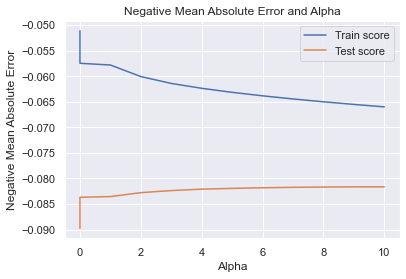

In [80]:
#Plotting mean test and train scoes with alpha

ridgeCV_results['param_alpha'] = ridgeCV_results['param_alpha'].astype('int32')

plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'])
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['Train score', 'Test score'], loc='upper right')
plt.show()

In [81]:
#Creating a ridge regreesion instance with optimum value alpha = 10

ridge = Ridge(alpha=10)

In [82]:
#Fitting the model on training data

ridge.fit(x_train, y_train)

Ridge(alpha=10)

In [83]:
#Coefficients of ridge regression fitted model

ridge.coef_

array([ 1.52851988e-02,  1.39938335e-02,  9.84753037e-04,  3.16664986e-02,
        1.66162433e-02, -5.30780243e-03,  4.26038898e-02,  5.19971517e-02,
        0.00000000e+00,  3.31229802e-02,  9.44347065e-03, -4.07240027e-04,
        2.83881157e-02,  1.72213590e-02,  1.18862556e-02,  0.00000000e+00,
        1.01048389e-02,  3.25177922e-02,  1.25435783e-02,  8.67793036e-03,
        3.85194149e-03,  0.00000000e+00,  7.16546866e-03,  0.00000000e+00,
        0.00000000e+00, -5.57580182e-02, -4.22012854e-02, -8.80830837e-03,
       -4.83284046e-03,  3.32111955e-03, -3.05348648e-02,  5.53502316e-02,
        3.45446686e-02, -5.79553586e-03,  7.71801375e-03, -1.76138034e-02,
        1.90874531e-04, -6.66065850e-02, -2.67682241e-02, -2.55453424e-02,
        2.86509307e-02,  2.51288742e-02,  2.90312423e-02, -2.00688972e-02,
        2.24425672e-02, -6.97938192e-03,  1.82944842e-02, -3.62915205e-02,
        4.15113216e-03,  2.76267750e-02,  2.35198891e-02,  3.35485090e-02,
        4.75792955e-02, -

In [84]:
#Ridge model parameters

ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = x.columns
cols = cols.insert(0, 'Constant')
list(zip(cols, ridge_model_parameters))

[('Constant', 11.747),
 ('LotFrontage', 0.015),
 ('LotArea', 0.014),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.017),
 ('TotalBsmtSF', -0.005),
 ('1stFlrSF', 0.043),
 ('2ndFlrSF', 0.052),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.033),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.028),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', 0.012),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.009),
 ('EnclosedPorch', 0.004),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.007),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('Age', -0.056),
 ('MSSubClass_30', -0.042),
 ('MSSubClass_40', -0.009),
 ('MSSubClass_45', -0.005),
 ('MSSubClass_50', 0.003),
 ('MSSubClass_60', -0.031),
 ('MSSubClass_70', 0.055),
 ('MSSubClass_75', 0.035),
 ('MSSubClass_80', -0.006),
 ('MSSubClass_85', 0.008),
 ('MSSubClass_90', -0.018),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.067),
 ('MSSubClass_180', -0.027),
 ('MSSubCla

In [85]:
#Making prediction

y_train_pred = ridge.predict(x_train)
y_pred = ridge.predict(x_test)

In [86]:
#Ridge regression
lm = Ridge(alpha=2)
lm.fit(x_train, y_train)

#Prediction on the test set (Using R2)
y_train_pred = lm.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.944418143905367
0.874736884642638


In [87]:
#Defining function for checking metrics

def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    metric = []
    
    #R-squared
    print('R-Squared (Train) =', r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print('R-Squared (Test) =', r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    #Residual Sum of Squares
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print('RSS (Train) =', rss_train)
    print('RSS (Test) =', rss_test)
    
    
    #Mean Squared Error
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print('MSE (Train) =', mse_train)
    print('MSE (Test) =', mse_test)
    
    #Root Mean Squared Error
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print('RMSE (Train) =', rmse_train) 
    print('RMSE (Test) =', rmse_test) 
    
    return metric

In [88]:
#Checking metrics

ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.944418143905367
R-Squared (Test) = 0.8930083472701912
RSS (Train) = 7.083095456048248
RSS (Test) = 5.763360806875351
MSE (Train) = 0.006937409849214739
MSE (Test) = 0.013158358006564728
RMSE (Train) = 0.08329111506766336
RMSE (Test) = 0.11470988626341118


Now, we will plot R2 Score against different values of alpha for both train and test sets

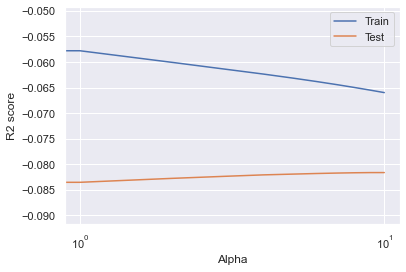

In [89]:
#Plotting R2 score vs alpha values

plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 score')
plt.xscale('Log')
plt.legend()
plt.show()

**Findings:**

- As the value of alpha increases, there is a decrease in train error and an increase test error.
- The graph also depic the optimal value of alpha is 10.

## 5.3. Lasso Regression

In [90]:
#List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

#Cross validation

folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
#The optimal value of alpha

lasso_cv.best_params_

{'alpha': 0.0001}

Our optimum value of alpha is 0.0001. Hence, we will build a Lasso regression model using this value.

In [92]:
#The results of cross validation

lasso_cv.cv_results_

{'mean_fit_time': array([0.12147379, 0.04468055, 0.01994576, 0.01515903, 0.01416183,
        0.01416302, 0.01296535, 0.01396408, 0.01197052, 0.03371415,
        0.01555824, 0.0213438 , 0.01915092, 0.02852354, 0.03291297,
        0.0191493 , 0.03910332, 0.0179522 , 0.01845002, 0.01675515,
        0.01995192, 0.0175539 , 0.03751311, 0.0187511 , 0.01695571,
        0.01775122, 0.0167552 , 0.03769822]),
 'std_fit_time': array([0.08327842, 0.01542945, 0.00109206, 0.00277453, 0.00171299,
        0.00222084, 0.00302403, 0.00209492, 0.00227147, 0.04401729,
        0.0007987 , 0.01080825, 0.00490284, 0.02016911, 0.0108161 ,
        0.00116283, 0.04229523, 0.0008926 , 0.00166649, 0.00074739,
        0.00454576, 0.00048928, 0.04109979, 0.00317913, 0.00109341,
        0.00040032, 0.00074663, 0.03805624]),
 'mean_score_time': array([0.00498629, 0.02134156, 0.00678177, 0.00598092, 0.00578508,
        0.00797853, 0.00698085, 0.00478396, 0.00578041, 0.0053803 ,
        0.00837803, 0.0133636 , 0.007181

 Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [93]:
lassoCV_results = pd.DataFrame(lasso_cv.cv_results_)
lassoCV_results = lassoCV_results[lassoCV_results['param_alpha']<=1]
lassoCV_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.121474      0.083278         0.004986        0.001262      0.0001   
1       0.044681      0.015429         0.021342        0.030221       0.001   
2       0.019946      0.001092         0.006782        0.000400        0.01   
3       0.015159      0.002775         0.005981        0.001266        0.05   
4       0.014162      0.001713         0.005785        0.001165         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.084324          -0.087268          -0.080272   
1   {'alpha': 0.001}          -0.078871          -0.088842          -0.084268   
2    {'alpha': 0.01}          -0.103868          -0.118136          -0.106593   
3    {'alpha': 0.05}          -0.141368          -0.141437          -0.135177   
4     {'alpha': 0.1}          -0.182573          -0.175566          -0.165996   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.074015          -0.070064        -0.079189        0.006370   
1          -0.073834          -0.079083        -0.080980        0.005133   
2          -0.106224          -0.106392        -0.108243        0.005045   
3          -0.137142          -0.134607        -0.137946        0.002945   
4          -0.172188          -0.175339        -0.174332        0.005377   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.054354           -0.054816   
1                2           -0.072488           -0.067764   
2                3           -0.107154           -0.099604   
3                4           -0.138852           -0.128182   
4                5           -0.174690           -0.167380   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.055237           -0.057212           -0.056459   
1           -0.068706           -0.073159           -0.072612   
2           -0.105325           -0.107096           -0.105865   
3           -0.135883           -0.138554           -0.140727   
4           -0.172408           -0.174524           -0.176263   

   mean_train_score  std_train_score  
0         -0.055616         0.001062  
1         -0.070946         0.002245  
2         -0.105009         0.002793  
3         -0.136440         0.004408  
4         -0.173053         0.003090

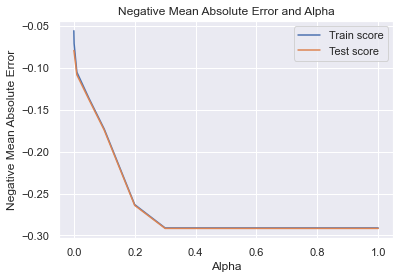

In [94]:
#Plotting mean test and train scoes with alpha

lassoCV_results['param_alpha'] = lassoCV_results['param_alpha'].astype('float32')

plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'])
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and Alpha')
plt.legend(['Train score', 'Test score'], loc='upper right')
plt.show()

**Findings:**

- Negative Mean Absolute Error is quite low at alpha = 0.3 and stabilises thereafter
- However, we will choose a low value of alpha (0.0001) to balance the trade-off between Bias and Variance and to get the coefficients of smallest of features.

In [95]:
#Creating a lasso regreesion instance with optimum value alpha=0.001

lasso = Lasso(alpha=0.0001)

In [96]:
#Fitting the model on training data

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [97]:
#Coefficients of lasso regression fitted model

lasso.coef_

array([ 9.86946364e-03,  2.08649448e-02,  1.18443170e-03,  2.02068869e-02,
        1.06394963e-02,  3.55325789e-02,  6.82936621e-02,  7.64444306e-02,
        0.00000000e+00,  8.63317389e-03,  1.08493298e-02, -1.43444184e-03,
        1.99418228e-02,  1.44234864e-02,  3.14902285e-03,  0.00000000e+00,
       -4.14657900e-04,  3.06911823e-02,  1.13765848e-02,  9.67846596e-03,
        2.49374312e-03,  0.00000000e+00,  5.11927903e-03,  0.00000000e+00,
        0.00000000e+00, -7.52854409e-02, -3.34215656e-02, -0.00000000e+00,
       -1.09567063e-02,  7.17303743e-03, -1.12625803e-02,  5.06437252e-02,
        3.94755760e-02, -0.00000000e+00,  0.00000000e+00, -5.32575478e-02,
       -2.22711324e-02, -1.11210842e-01, -5.21552099e-02, -6.59137699e-02,
        6.18731271e-02,  5.64258705e-02,  4.46170155e-02, -0.00000000e+00,
        2.98503759e-02, -6.05640377e-03,  3.02969827e-03,  9.26244960e-03,
        6.74204417e-03, -0.00000000e+00,  0.00000000e+00,  1.25907286e-02,
        3.92673616e-02, -

**The advantage of Lassois to bring the coefficients of insignificant features to 0.**

In [98]:
#Lasso model parameters

lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = x.columns
cols = cols.insert(0, 'Constant')
list(zip(cols, lasso_model_parameters))

[('Constant', 11.742),
 ('LotFrontage', 0.01),
 ('LotArea', 0.021),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.02),
 ('BsmtFinSF2', 0.011),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.068),
 ('2ndFlrSF', 0.076),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.009),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.02),
 ('HalfBath', 0.014),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', -0.0),
 ('GarageArea', 0.031),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.01),
 ('EnclosedPorch', 0.002),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('Age', -0.075),
 ('MSSubClass_30', -0.033),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', -0.011),
 ('MSSubClass_50', 0.007),
 ('MSSubClass_60', -0.011),
 ('MSSubClass_70', 0.051),
 ('MSSubClass_75', 0.039),
 ('MSSubClass_80', -0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.053),
 ('MSSubClass_120', -0.022),
 ('MSSubClass_160', -0.111),
 ('MSSubClass_180', -0.052),
 ('MSSubClass_190

In [99]:
#Making prediction

y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

In [100]:
#Lasso Regression

lm = Lasso(alpha=0.0001)
lm.fit(x_train, y_train)

#Prediction on the test set (Using R2)

y_train_pred = lm.predict(x_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(x_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9537350118109958
0.7379447785971636


**FIndings:**

It is noticable that the model performance is worse than Ridge Regression. The train and the test scores are matching better in Ridge model (0.94 & 0.87)

In [101]:
#Checking metrics

lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.9537350118109958
R-Squared (Test) = 0.7379447785971636
RSS (Train) = 5.895796769681892
RSS (Test) = 14.11623013324443
MSE (Train) = 0.0057745316059568
MSE (Test) = 0.03222883592064939
RMSE (Train) = 0.07599033889881529
RMSE (Test) = 0.17952391462044656


Now, we will plot R2 Score against different values of alpha for both train and test sets

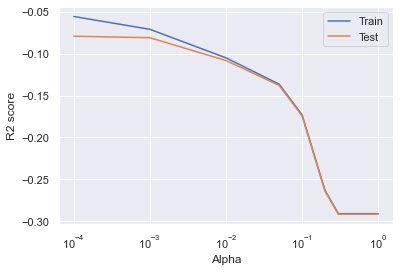

In [102]:
#Plotting R2 score vs alpha values

plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 score')
plt.xscale('Log')
plt.legend()
plt.show()

# VI. Model Evaluation

In [103]:
#Creating a table to compare and constrast the metrics between the two models

table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

metric = pd.DataFrame(table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.944418          0.953735
R2 Score (Test)           0.893008          0.737945
RSS (Train)               7.083095          5.895797
RSS (Test)                5.763361         14.116230
MSE (Train)               0.006937          0.005775
MSE (Test)                0.013158          0.032229
RMSE (Train)              0.083291          0.075990
RMSE (Test)               0.114710          0.179524

- The R2 score on train data is 0.958 for both Ridge Regression and Lasso models.
- The R2 score on test data of Ridge Regression is higher than Lasso models.

In [104]:
#Let's see the changes in coefficients after regularization

betas = pd.DataFrame(index=x.columns)
betas.rows = x.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

Ridge     Lasso
LotFrontage            0.015285  0.009869
LotArea                0.013994  0.020865
MasVnrArea             0.000985  0.001184
BsmtFinSF1             0.031666  0.020207
BsmtFinSF2             0.016616  0.010639
...                         ...       ...
SaleCondition_AdjLand  0.009160  0.024877
SaleCondition_Alloca   0.029620  0.069719
SaleCondition_Family   0.001952  0.014205
SaleCondition_Normal   0.040270  0.042899
SaleCondition_Partial  0.023104  0.050660

[279 rows x 2 columns]

In [105]:
#Features removed by Lasso

betas[betas['Lasso']==0]

Ridge  Lasso
LowQualFinSF          0.000000    0.0
KitchenAbvGr          0.000000    0.0
3SsnPorch             0.000000    0.0
PoolArea              0.000000    0.0
MiscVal               0.000000    0.0
MSSubClass_40        -0.008808   -0.0
MSSubClass_80        -0.005796   -0.0
MSSubClass_85         0.007718    0.0
MSZoning_RM          -0.020069   -0.0
LandContour_HLS       0.027627   -0.0
LandContour_Low       0.023520    0.0
LotConfig_FR3        -0.000752    0.0
Neighborhood_Blueste  0.001538    0.0
Neighborhood_NPkVill -0.006553    0.0
Neighborhood_NoRidge  0.010158    0.0
Neighborhood_OldTown -0.025526   -0.0
Neighborhood_SawyerW -0.010585    0.0
Neighborhood_Timber  -0.004123   -0.0
Condition1_RRNe       0.000377    0.0
Condition1_RRNn       0.000900    0.0
Condition2_Feedr      0.003918    0.0
Condition2_RRAe      -0.001211   -0.0
Condition2_RRAn      -0.004934   -0.0
Condition2_RRNn       0.009013    0.0
BldgType_TwnhsE      -0.027446   -0.0
HouseStyle_1.5Unf     0.000014   -0.0
HouseStyle_2.5Unf     0.003738   -0.0
HouseStyle_SLvl      -0.006096   -0.0
OverallQual_2        -0.013526    0.0
OverallCond_5        -0.035045   -0.0
RoofStyle_Gambrel    -0.003349   -0.0
RoofStyle_Mansard     0.012423    0.0
RoofStyle_Shed        0.007146    0.0
RoofMatl_CompShg      0.035013    0.0
RoofMatl_Metal        0.004618    0.0
RoofMatl_Roll         0.006893    0.0
RoofMatl_Tar&Grv      0.004750   -0.0
RoofMatl_WdShake      0.004790    0.0
Exterior1st_AsphShn  -0.005221   -0.0
Exterior1st_CBlock   -0.007300   -0.0
Exterior1st_CemntBd  -0.001233    0.0
Exterior1st_ImStucc   0.004888    0.0
Exterior1st_MetalSd   0.003659    0.0
Exterior1st_Plywood   0.012503    0.0
Exterior1st_Stone     0.009255    0.0
Exterior1st_Stucco   -0.009396    0.0
Exterior2nd_AsphShn  -0.005221   -0.0
Exterior2nd_Brk Cmn  -0.002322    0.0
Exterior2nd_CBlock   -0.007300   -0.0
Exterior2nd_MetalSd   0.004465    0.0
Exterior2nd_Other     0.000000    0.0
Exterior2nd_Stone    -0.001881    0.0
Exterior2nd_VinylSd   0.006637   -0.0
MasVnrType_None       0.002517    0.0
MasVnrType_none      -0.006643   -0.0
ExterQual_Fa         -0.024018   -0.0
ExterQual_TA         -0.017142   -0.0
ExterCond_Po          0.000000    0.0
ExterCond_TA         -0.007328    0.0
Foundation_Slab       0.000019   -0.0
Foundation_Wood      -0.000046   -0.0
BsmtQual_none        -0.022264   -0.0
BsmtCond_Po          -0.010239   -0.0
BsmtCond_none        -0.022264   -0.0
BsmtFinType1_none    -0.022264   -0.0
Heating_GasW          0.013484    0.0
HeatingQC_Fa         -0.010374   -0.0
HeatingQC_Po         -0.008625   -0.0
Electrical_FuseF     -0.001706    0.0
Electrical_FuseP      0.010929    0.0
Electrical_Mix        0.000000    0.0
Functional_Mod        0.009475    0.0
FireplaceQu_Po       -0.028461   -0.0
GarageType_Basment    0.010029   -0.0
GarageType_Detchd     0.014739    0.0
GarageQual_Po        -0.000879   -0.0
GarageCond_Fa        -0.011792   -0.0
GarageCond_Gd        -0.006716   -0.0
PoolQC_Fa             0.008067    0.0
Fence_MnWw           -0.003702   -0.0
MiscFeature_TenC      0.000000    0.0
MiscFeature_none     -0.001157   -0.0
SaleType_ConLI       -0.002555   -0.0
SaleType_ConLw       -0.003915    0.0
SaleType_Oth          0.001140    0.0

In [106]:
#The number of removed features by lasso

betas[betas['Lasso']==0].shape

(85, 2)

In this way, lasso performs feature selection.

In [107]:
#Selected features by lasso

betas.loc[betas['Lasso']!=0, 'Lasso']

LotFrontage              0.009869
LotArea                  0.020865
MasVnrArea               0.001184
BsmtFinSF1               0.020207
BsmtFinSF2               0.010639
                           ...   
SaleCondition_AdjLand    0.024877
SaleCondition_Alloca     0.069719
SaleCondition_Family     0.014205
SaleCondition_Normal     0.042899
SaleCondition_Partial    0.050660
Name: Lasso, Length: 194, dtype: float64

### Top 10 features significant in predicting the value of a house:

**Ridge regression**

In [108]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.131378
OverallQual_8           0.103256
Neighborhood_Crawfor    0.084332
PoolQC_none             0.076423
OverallCond_9           0.068729
Neighborhood_ClearCr    0.059930
MSSubClass_70           0.055350
Neighborhood_NridgHt    0.052881
2ndFlrSF                0.051997
Neighborhood_Somerst    0.051191
Name: Ridge, dtype: float64

In [109]:
#To interpret coefficients in terms of target, we will take inverse log of betas

ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.140399
OverallQual_8           1.108775
Neighborhood_Crawfor    1.087990
PoolQC_none             1.079419
OverallCond_9           1.071146
Neighborhood_ClearCr    1.061762
MSSubClass_70           1.056911
Neighborhood_NridgHt    1.054304
2ndFlrSF                1.053373
Neighborhood_Somerst    1.052524
Name: Ridge, dtype: float64

In [110]:
#Creating a dataframe for Ridge Coefficients

data_ridge = list(zip(cols, ridge_model_parameters))

In [111]:
para_ridge = pd.DataFrame(data_ridge)
para_ridge.columns = ['Variable', 'Coeff']
para_ridge = para_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
para_ridge.head()

Variable   Coeff
0                Constant  11.747
116         OverallQual_9   0.131
115         OverallQual_8   0.103
64   Neighborhood_Crawfor   0.084
258           PoolQC_none   0.076

In [112]:
#Choosing variables whose coefficients are non-zero

pred_ridge = pd.DataFrame(para_ridge[(para_ridge['Coeff'] != 0)])
pred_ridge

Variable   Coeff
0                Constant  11.747
116         OverallQual_9   0.131
115         OverallQual_8   0.103
64   Neighborhood_Crawfor   0.084
258           PoolQC_none   0.076
..                    ...     ...
94        Condition2_PosN  -0.065
38         MSSubClass_160  -0.067
65   Neighborhood_Edwards  -0.068
111         OverallQual_4  -0.074
257             PoolQC_Gd  -0.089

[260 rows x 2 columns]

**Lasso regression**

In [113]:
betas['Lasso'].sort_values(ascending=False)[:10]

Condition2_PosA         0.245511
OverallQual_9           0.187673
OverallCond_9           0.176150
SaleType_ConLD          0.161303
Neighborhood_Crawfor    0.135050
OverallQual_8           0.127486
OverallCond_8           0.107296
Neighborhood_ClearCr    0.100644
OverallCond_7           0.090003
Neighborhood_StoneBr    0.079433
Name: Lasso, dtype: float64

In [114]:
#To interpret coefficients in terms of target, we will take inverse log of betas

ridge_coeffs = np.exp(betas['Lasso'])
ridge_coeffs.sort_values(ascending=False)[:10]

Condition2_PosA         1.278275
OverallQual_9           1.206439
OverallCond_9           1.192617
SaleType_ConLD          1.175041
Neighborhood_Crawfor    1.144594
OverallQual_8           1.135969
OverallCond_8           1.113263
Neighborhood_ClearCr    1.105883
OverallCond_7           1.094178
Neighborhood_StoneBr    1.082673
Name: Lasso, dtype: float64

In [115]:
#Creating a dataframe for Lasso Coefficients

data_lasso = list(zip(cols, lasso_model_parameters))

In [116]:
para_lasso = pd.DataFrame(data_lasso)
para_lasso.columns = ['Variable', 'Coeff']
para_lasso = para_lasso.sort_values((['Coeff']), axis = 0, ascending = False)
para_lasso.head()

Variable   Coeff
0           Constant  11.742
93   Condition2_PosA   0.246
116    OverallQual_9   0.188
125    OverallCond_9   0.176
269   SaleType_ConLD   0.161

In [117]:
#Choosing variables whose coefficients are non-zero

pred_lasso = pd.DataFrame(para_lasso[(para_lasso['Coeff'] != 0)])
pred_lasso

Variable   Coeff
0                Constant  11.742
93        Condition2_PosA   0.246
116         OverallQual_9   0.188
125         OverallCond_9   0.176
269        SaleType_ConLD   0.161
..                    ...     ...
68   Neighborhood_MeadowV  -0.110
38         MSSubClass_160  -0.111
228        Functional_Sev  -0.124
94        Condition2_PosN  -0.981
257             PoolQC_Gd  -1.679

[189 rows x 2 columns]

# VII. Inferences

**1. Though the model performance by Ridge Regression was better in terms of R2 values of Train, it is recommended to use Lasso Regression, since it assigns a zero value to insignificant features, thus making a simple and robust model.**

**2. Equation can be formulated using the features and coefficients obtained by Lasso (let's use our top 10)**

 |  Feature  |  Coeff  |
 |  ---  |  ---  |
 |  Condition2_PosA           |  0.245511  |
 |  OverallQual_9             |  0.187673  |
 |  OverallCond_9             |  0.176150  |
 |  SaleType_ConLD            |  0.161303  |
 |  Neighborhood_Crawfor      |  0.135050  |
 |  OverallQual_8             |  0.127486  |
 |  OverallCond_8             |  0.107296  |
 |  Neighborhood_ClearCr      |  0.100644  |
 |  OverallCond_7             |  0.090003  |
 |  Neighborhood_StoneBr      |  0.079433  |

**Log(Y) = C + 0.246(Condition2_PosA) + 0.188(OverallQual_9) +  0.176(OverallCond_9) +  0.161(SaleType_ConLD) +  0.135(Neighborhood_Crawfor) +  0.127(OverallQual_8) + 0.107(OverallCond_8) +  0.101(Neighborhood_ClearCr) + 0.090(OverallCond_7) + 0.079(Neighborhood_StoneBr) + Error term(RSS + alpha * (sum of absolute value of coefficients)**

**3. The variables play significant role in predicting the price of a house:**

Condition2_PosA, OverallQual_9, OverallCond_9, SaleType_ConLD, Neighborhood_Crawfor, OverallQual_8, OverallCond_8, Neighborhood_ClearCr, OverallCond_7, and Neighborhood_StoneBr

**4. Inferences**

The higher values of positive coeeficients suggest a high sale value:

 |  Feature  |  Description  |  Feature  |
 |  ---  |  ---  |  ---  |
 |  Condition2_PosA  | Proximity to various conditions  |  Adjacent to postive off-site feature
 |  OverallQual_9  |  Rates the overall material and finish of the house  |  Excellent
 |  OverallCond_9  |  RRates the overall condition of the house  |  Excellent
 |  SaleType_ConLD  |  Type of sale  |  Contract Low Down
 |  Neighborhood_Crawfor  |  Physical locations within Ames city limits  |  Crawford
        
The higher values of negative coeeficients suggest a decrease in sale value:

 |  Feature  |  Description  |  Feature  |
 |  ---  |  ---  |  ---  |
 |  PoolQC_Gd  | Pool quality  |  Good
 |  Condition2_PosN  |  Proximity to various conditions  |  Near positive off-site feature--park, greenbelt, etc.
 |  Functional_Sev  |  RHome functionality  |  Severely Damaged
 |  MSSubClass_160  |  Identifies the type of dwelling involved in the sale  |  2-STORY PUD - 1946 & NEWER
 |  Neighborhood_MeadowV  | Physical locations within Ames city limits  |  Meadow Village
    

When the market value of the property < the Predicted Sale Price, its time to buy.

**5. How top variables describe the price of a house:**

- Condition2_PosA: if the proximity to various conditions is adjacent to postive off-site feature, the house price will raise to 1.28 times.
- OverallQual_9: if the overall material and finish of the house is Excellent, the price of house will increase by 1.14 to 1.21 times
- OverallCond_9: if rates the overall condition of the house is excellent, the price off house will increase by 1.07 to 1.21 times.
- SaleType_ConLD: if one is under Contract Low Down sale, the house rice will raise to 1.18 times.
- Neighborhood_Crawfor: if Crawford is a nearby location, then the price of house will increase by 1.09 to 1.14 times

**6. Optimal value of alpha for Ridge Regression = 10**

**7. Optimal value of alpha for Lasso = 0.0001**

# VIII. Subjective Questions

## Question 1

In [118]:
#Ridge regression model with double value of alpha (20)

ridge = Ridge(alpha=20)

#Fitting the model on training data

ridge.fit(x_train, y_train)

Ridge(alpha=20)

In [119]:
#Predictions

y_train_pred = ridge.predict(x_train)
y_pred = ridge.predict(x_test)

In [120]:
#Checking metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.9239525462744597
R-Squared (Test) = 0.8933147339009168
RSS (Train) = 9.691136852470578
RSS (Test) = 5.74685655954184
MSE (Train) = 0.009491808866278725
MSE (Test) = 0.013120677076579542
RMSE (Train) = 0.09742591475720783
RMSE (Test) = 0.1145455240355534


In [121]:
#Lasso regression model with double value of alpha (0.0002)

lasso = Lasso(alpha=0.0002)

#Fitting the model on training data

lasso.fit(x_train, y_train)

Lasso(alpha=0.0002)

In [122]:
#Predictions

y_train_pred = lasso.predict(x_train)
y_pred = lasso.predict(x_test)

In [123]:
#Checking metrics

lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.9491753700013287
R-Squared (Test) = 0.7758959225715163
RSS (Train) = 6.476856497667117
RSS (Test) = 12.071901158252068
MSE (Train) = 0.006343640056481015
MSE (Test) = 0.02756141816952527
RMSE (Train) = 0.07964697142064484
RMSE (Test) = 0.1660163189855903


In [124]:
#Creating a table to compare and constrast the metrics between the two models

table_2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

metric_2 = pd.DataFrame(table_2, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
metric_2.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.923953          0.949175
R2 Score (Test)           0.893315          0.775896
RSS (Train)               9.691137          6.476856
RSS (Test)                5.746857         12.071901
MSE (Train)               0.009492          0.006344
MSE (Test)                0.013121          0.027561
RMSE (Train)              0.097426          0.079647
RMSE (Test)               0.114546          0.166016

**Changes in Ridge Regression metrics:**

- R2 score of train set decreased from 0.94 to 0.92
- R2 score of test set remained unchanged at 0.89

**Changes in Lasso metrics:**

- R2 score of train set slightly decreased from 0.954 to 0.949
- R2 score of test set increased from 0.74 to 0.78

In [125]:
#Let's check the changes in coefficients after regularization

betas_2 = pd.DataFrame(index=x.columns)
betas_2.rows = x.columns
betas_2['Ridge'] = ridge.coef_
betas_2['Lasso'] = lasso.coef_
betas_2

Ridge     Lasso
LotFrontage            0.016235  0.010738
LotArea                0.012823  0.017788
MasVnrArea             0.003026  0.000486
BsmtFinSF1             0.032708  0.023384
BsmtFinSF2             0.016680  0.011626
...                         ...       ...
SaleCondition_AdjLand  0.003924  0.000000
SaleCondition_Alloca   0.018160  0.049383
SaleCondition_Family  -0.002323  0.000000
SaleCondition_Normal   0.036253  0.043411
SaleCondition_Partial  0.020532  0.035847

[279 rows x 2 columns]

**Most important predictor variables after the change is implemented:**

In [126]:
betas_2['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.101602
OverallQual_8           0.091873
Neighborhood_Crawfor    0.068551
MSSubClass_70           0.051545
PoolQC_none             0.049806
Neighborhood_NridgHt    0.047403
OverallCond_9           0.046970
2ndFlrSF                0.044247
Neighborhood_Somerst    0.044106
LotConfig_CulDSac       0.043425
Name: Ridge, dtype: float64

In [127]:
#To interpret coefficients in terms of target, we will take inverse log of betas

ridge_coeffs = np.exp(betas_2['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.106942
OverallQual_8           1.096226
Neighborhood_Crawfor    1.070955
MSSubClass_70           1.052897
PoolQC_none             1.051067
Neighborhood_NridgHt    1.048544
OverallCond_9           1.048090
2ndFlrSF                1.045240
Neighborhood_Somerst    1.045093
LotConfig_CulDSac       1.044381
Name: Ridge, dtype: float64

In [128]:
betas_2['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.217381
OverallCond_9           0.168465
OverallQual_8           0.150313
Neighborhood_Crawfor    0.133299
OverallCond_8           0.105895
SaleType_ConLD          0.100342
Condition2_PosA         0.098025
Neighborhood_ClearCr    0.094885
OverallCond_7           0.092003
OverallQual_7           0.080004
Name: Lasso, dtype: float64

In [129]:
#To interpret coefficients in terms of target, we will take inverse log of betas

ridge_coeffs = np.exp(betas_2['Lasso'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.242817
OverallCond_9           1.183486
OverallQual_8           1.162198
Neighborhood_Crawfor    1.142592
OverallCond_8           1.111705
SaleType_ConLD          1.105549
Condition2_PosA         1.102990
Neighborhood_ClearCr    1.099533
OverallCond_7           1.096368
OverallQual_7           1.083291
Name: Lasso, dtype: float64

**Most important predictor variables:**

No.  |  Feature  |
    ---  |  ---  |
1|OverallQual_9
2|OverallCond_9
3|OverallQual_8
4|Neighborhood_Crawfor
5|OverallCond_8
6|SaleType_ConLD
7|Condition2_PosA
8|Neighborhood_ClearCr
9|OverallCond_7
10|OverallQual_7

## Question 3

Let's drop the top 5 features in Lasso model and build the model again:

Our top five predictors are:

No.  |  Feature  |
    ---  |  ---  |
1|OverallQual_9
2|OverallCond_9
3|OverallQual_8
4|Neighborhood_Crawfor
5|OverallCond_8

In [130]:
#Creating a list of top 5 lasso predictors to remove

top5 = ['OverallQual_9', 'OverallCond_9', 'OverallQual_8', 'Neighborhood_Crawfor', 'OverallCond_8']

In [131]:
#Dropping them from train and test data

x_train_drop = x_train.drop(top5, axis=1)
x_test_drop = x_test.drop(top5, axis=1)

In [132]:
#List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

#Cross validation

folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(x_train_drop, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
#The optimal value of alpha

lasso_cv.best_params_

{'alpha': 0.0001}

In [134]:
#Creating a lasso regreesion instance with optimum value alpha=0.001

lasso = Lasso(alpha=0.0001)

In [135]:
#Fitting the model on training data

lasso.fit(x_train_drop, y_train)

Lasso(alpha=0.0001)

In [136]:
#Predictions

y_train_pred = lasso.predict(x_train_drop)
y_pred = lasso.predict(x_test_drop)

In [137]:
#Checking metrics

lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.9517510395833402
R-Squared (Test) = 0.7369689453879364
RSS (Train) = 6.148625042395704
RSS (Test) = 14.168795718770149
MSE (Train) = 0.006022159688928211
MSE (Test) = 0.032348848672991204
RMSE (Train) = 0.07760257527252695
RMSE (Test) = 0.17985785685643874


In [138]:
#Let's see the changes in coefficients after regularization

betas = pd.DataFrame(index=x_train_drop.columns)
betas.rows = x_train_drop.columns
betas['Lasso'] = lasso.coef_
betas

Lasso
LotFrontage            0.011117
LotArea                0.020896
MasVnrArea             0.004549
BsmtFinSF1             0.022305
BsmtFinSF2             0.010188
...                         ...
SaleCondition_AdjLand  0.029264
SaleCondition_Alloca   0.071598
SaleCondition_Family   0.013933
SaleCondition_Normal   0.042398
SaleCondition_Partial  0.048207

[274 rows x 1 columns]

In [139]:
#Top 5 coefficients of Lasso

betas['Lasso'].sort_values(ascending=False)[:5]

Condition2_PosA    0.363338
SaleType_ConLD     0.167936
2ndFlrSF           0.086431
MSSubClass_70      0.081918
1stFlrSF           0.078386
Name: Lasso, dtype: float64